In [1]:
#loading packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#loading the cab_data dataset
cab_data = pd.read_csv(r'D:\Purity\DataGlacier Internship\week2\DataSets-main\Cab_Data.csv')
#checking the shape
print(cab_data.shape)
#getting the first 5 rows
cab_data.head()

(359392, 7)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
#loading the city dataset
city = pd.read_csv(r'D:\Purity\DataGlacier Internship\week2\DataSets-main\City.csv')
#checking the shape
print(city.shape)
#getting the first 5 rows
city.head()

(20, 3)


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [4]:
#loading the customer_id dataset
customer_id = pd.read_csv(r'D:\Purity\DataGlacier Internship\week2\DataSets-main\Customer_ID.csv')
#checking the shape
print(customer_id.shape)
#getting the first 5 rows
customer_id.head()

(49171, 4)


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [5]:
#loading the transaction_id dataset
transaction_id = pd.read_csv(r'D:\Purity\DataGlacier Internship\week2\DataSets-main\Transaction_ID.csv')
#checking the shape
print(transaction_id.shape)
#getting the first 5 rows
transaction_id.head()

(440098, 3)


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [6]:
#replacing the spaces in the column names with '_'
Dataframes = [cab_data, city, customer_id, transaction_id]
for df in Dataframes:
    df.columns = df.columns.str.replace(' ', '_')

In [7]:
for df in Dataframes:
    print('\n')
    #checking variable types
    print(df.dtypes)
    #checking missing data
    print(df.isna().sum())



Transaction_ID      int64
Date_of_Travel      int64
Company            object
City               object
KM_Travelled      float64
Price_Charged     float64
Cost_of_Trip      float64
dtype: object
Transaction_ID    0
Date_of_Travel    0
Company           0
City              0
KM_Travelled      0
Price_Charged     0
Cost_of_Trip      0
dtype: int64


City          object
Population    object
Users         object
dtype: object
City          0
Population    0
Users         0
dtype: int64


Customer_ID            int64
Gender                object
Age                    int64
Income_(USD/Month)     int64
dtype: object
Customer_ID           0
Gender                0
Age                   0
Income_(USD/Month)    0
dtype: int64


Transaction_ID     int64
Customer_ID        int64
Payment_Mode      object
dtype: object
Transaction_ID    0
Customer_ID       0
Payment_Mode      0
dtype: int64


In [8]:
#joining cab_data and transcation_id
first_merge = pd.merge(cab_data, transaction_id, how='outer', on=['Transaction_ID'])
print(first_merge.shape)
first_merge.head()

(440098, 9)


,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [9]:
first_merge.isna().sum()

Transaction_ID        0
Date_of_Travel    80706
Company           80706
City              80706
KM_Travelled      80706
Price_Charged     80706
Cost_of_Trip      80706
Customer_ID           0
Payment_Mode          0
dtype: int64

In [10]:
#joining customer_id into the merged dataset
second_merge = pd.merge(customer_id, first_merge, how='outer', on=['Customer_ID'])
print(second_merge.shape)
second_merge.head()

(440098, 12)


,Customer_ID,Gender,Age,Income_(USD/Month),Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode
0,29290,Male,28,10813,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card
1,29290,Male,28,10813,10351127,43302.0,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Cash
2,29290,Male,28,10813,10412921,43427.0,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Card
3,27703,Male,27,9237,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card
4,27703,Male,27,9237,10320494,43211.0,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Card


In [11]:
second_merge.isna().sum()

Customer_ID               0
Gender                    0
Age                       0
Income_(USD/Month)        0
Transaction_ID            0
Date_of_Travel        80706
Company               80706
City                  80706
KM_Travelled          80706
Price_Charged         80706
Cost_of_Trip          80706
Payment_Mode              0
dtype: int64

In [12]:
#joining city to the merged dataframes
master_data = pd.merge(city, second_merge, how='outer', on=['City'])
print(master_data.shape)
master_data.head()

(440099, 14)


,City,Population,Users,Customer_ID,Gender,Age,Income_(USD/Month),Transaction_ID,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode
0,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10000139.0,42377.0,Pink Cab,17.85,242.90,198.1350,Cash
1,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10006684.0,42405.0,Yellow Cab,34.34,1099.35,482.1336,Cash
2,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10015798.0,42442.0,Yellow Cab,19.20,559.30,264.9600,Card
3,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10074689.0,42621.0,Yellow Cab,14.84,322.28,179.8608,Card
4,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10078883.0,42631.0,Pink Cab,37.08,728.27,393.0480,Card


In [13]:
master_data.isna().sum()

City                  80706
Population            80706
Users                 80706
Customer_ID               1
Gender                    1
Age                       1
Income_(USD/Month)        1
Transaction_ID            1
Date_of_Travel        80707
Company               80707
KM_Travelled          80707
Price_Charged         80707
Cost_of_Trip          80707
Payment_Mode              1
dtype: int64

In [14]:
#checking for duplicates in the master data
print(master_data.Transaction_ID.unique().shape)
#checking variable types
master_data.dtypes

(440099,)


City                   object
Population             object
Users                  object
Customer_ID           float64
Gender                 object
Age                   float64
Income_(USD/Month)    float64
Transaction_ID        float64
Date_of_Travel        float64
Company                object
KM_Travelled          float64
Price_Charged         float64
Cost_of_Trip          float64
Payment_Mode           object
dtype: object

In [15]:
#dropping rows with missing values
master_data.dropna(axis=0, inplace=True)
master_data.shape

(359392, 14)

In [16]:
#converting population and users column to float
cols = ['Population','Users']
for col in cols:
    #removing the comas, then converting to float
    master_data[col]=(master_data[col].str.split()).apply(lambda x: float(x[0].replace(',', '')))
master_data[cols].dtypes

Population    float64
Users         float64
dtype: object

In [17]:
#creating a profits column
master_data['Profit'] = master_data['Price_Charged'] - master_data['Cost_of_Trip']
master_data.head()

,City,Population,Users,Customer_ID,Gender,Age,Income_(USD/Month),Transaction_ID,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Profit
0,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10000139.0,42377.0,Pink Cab,17.85,242.90,198.1350,Cash,44.7650
1,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10006684.0,42405.0,Yellow Cab,34.34,1099.35,482.1336,Cash,617.2164
2,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10015798.0,42442.0,Yellow Cab,19.20,559.30,264.9600,Card,294.3400
3,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10074689.0,42621.0,Yellow Cab,14.84,322.28,179.8608,Card,142.4192
4,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10078883.0,42631.0,Pink Cab,37.08,728.27,393.0480,Card,335.2220


In [18]:
#getting statistical summary of numerical columns
master_data.describe()

,Population,Users,Customer_ID,Age,Income_(USD/Month),Transaction_ID,Date_of_Travel,KM_Travelled,Price_Charged,Cost_of_Trip,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,3.132198e+06,158365.582267,19191.652115,35.336705,15048.822937,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,137.253198
std,3.315194e+06,100850.051020,21012.412463,12.594234,7969.409482,1.268058e+05,307.467197,12.233526,274.378911,157.993661,160.311840
min,2.489680e+05,3643.000000,1.000000,18.000000,2000.000000,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,-220.060000
25%,6.712380e+05,80021.000000,2705.000000,25.000000,8424.000000,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,28.012000
50%,1.595037e+06,144132.000000,7459.000000,33.000000,14685.000000,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,81.962000
75%,8.405837e+06,302149.000000,36078.000000,42.000000,21035.000000,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,190.030000
max,8.405837e+06,302149.000000,60000.000000,65.000000,35000.000000,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,1463.966000


In [19]:
#converting from excel time series to python datetime
def convert_excel_time(excel_time):
    '''
    converts excel float format to pandas datetime object
    round to '1min' with 
    .dt.round('1min') to correct floating point conversion innaccuracy
    '''
    
    return pd.to_datetime('1899-12-30') + pd.to_timedelta(excel_time,'D')
master_data['Date_of_Travel'] = convert_excel_time(master_data['Date_of_Travel'])
master_data.head()

,City,Population,Users,Customer_ID,Gender,Age,Income_(USD/Month),Transaction_ID,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Profit
0,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10000139.0,2016-01-08,Pink Cab,17.85,242.90,198.1350,Cash,44.7650
1,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10006684.0,2016-02-05,Yellow Cab,34.34,1099.35,482.1336,Cash,617.2164
2,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10015798.0,2016-03-13,Yellow Cab,19.20,559.30,264.9600,Card,294.3400
3,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10074689.0,2016-09-08,Yellow Cab,14.84,322.28,179.8608,Card,142.4192
4,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10078883.0,2016-09-18,Pink Cab,37.08,728.27,393.0480,Card,335.2220


In [20]:
#extracting features from date column
for date_feature in ['year', 'quarter', 'month']:
    master_data[date_feature] = getattr(master_data['Date_of_Travel'].dt, date_feature)
master_data.head()

,City,Population,Users,Customer_ID,Gender,Age,Income_(USD/Month),Transaction_ID,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Profit,year,quarter,month
0,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10000139.0,2016-01-08,Pink Cab,17.85,242.90,198.1350,Cash,44.7650,2016,1,1
1,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10006684.0,2016-02-05,Yellow Cab,34.34,1099.35,482.1336,Cash,617.2164,2016,1,2
2,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10015798.0,2016-03-13,Yellow Cab,19.20,559.30,264.9600,Card,294.3400,2016,1,3
3,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10074689.0,2016-09-08,Yellow Cab,14.84,322.28,179.8608,Card,142.4192,2016,3,9
4,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10078883.0,2016-09-18,Pink Cab,37.08,728.27,393.0480,Card,335.2220,2016,3,9


In [21]:
#converting the variable types for date columns
cols = ['year', 'quarter', 'month']
for col in cols:
    master_data[col] = master_data[col].astype('category')
master_data[cols].dtypes

year       category
quarter    category
month      category
dtype: object

In [22]:
#grouping the dataset by company
df = master_data
df = df.groupby(['Company'])#grouping by company
df_pink = df.get_group('Pink Cab')#getting dataframe of just pink cab
df_yellow = df.get_group('Yellow Cab')#getting dataframe of just yellow cab

In [23]:
#Pink cab dataframe
df_pink.head()

,City,Population,Users,Customer_ID,Gender,Age,Income_(USD/Month),Transaction_ID,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Profit,year,quarter,month
0,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10000139.0,2016-01-08,Pink Cab,17.85,242.90,198.135,Cash,44.765,2016,1,1
4,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10078883.0,2016-09-18,Pink Cab,37.08,728.27,393.048,Card,335.222,2016,3,9
22,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10338439.0,2018-06-16,Pink Cab,4.95,53.81,50.985,Cash,2.825,2018,2,6
30,NEW YORK NY,8405837.0,302149.0,2060.0,Male,18.0,8149.0,10000140.0,2016-01-09,Pink Cab,25.30,407.21,255.530,Card,151.680,2016,1,1
32,NEW YORK NY,8405837.0,302149.0,2060.0,Male,18.0,8149.0,10016614.0,2016-03-17,Pink Cab,2.28,36.62,23.028,Card,13.592,2016,1,3


In [24]:
#Yellow cab dataframe
df_yellow.head()

,City,Population,Users,Customer_ID,Gender,Age,Income_(USD/Month),Transaction_ID,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Profit,year,quarter,month
1,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10006684.0,2016-02-05,Yellow Cab,34.34,1099.35,482.1336,Cash,617.2164,2016,1,2
2,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10015798.0,2016-03-13,Yellow Cab,19.20,559.30,264.9600,Card,294.3400,2016,1,3
3,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10074689.0,2016-09-08,Yellow Cab,14.84,322.28,179.8608,Card,142.4192,2016,3,9
5,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10111321.0,2016-11-19,Yellow Cab,32.98,981.40,439.2936,Cash,542.1064,2016,4,11
6,NEW YORK NY,8405837.0,302149.0,2416.0,Male,28.0,21399.0,10148638.0,2017-02-19,Yellow Cab,19.04,574.60,255.8976,Card,318.7024,2017,1,2


In [25]:
#numerical summary
for df in [df_pink, df_yellow]:
    if df['Company'].unique()=='Pink Cab':
        print('Pink Cab')
    else:
        print('Yellow Cab')
    print(df.describe())

Pink Cab
         Population          Users   Customer_ID           Age  \
count  8.471100e+04   84711.000000  84711.000000  84711.000000   
mean   2.350642e+06  125590.813330  18422.581577     35.322414   
std    2.734890e+06   94593.433659  18084.830799     12.644780   
min    2.489680e+05    3643.000000      1.000000     18.000000   
25%    8.148850e+05   27247.000000   5317.500000     25.000000   
50%    1.595037e+06  144132.000000   8876.000000     33.000000   
75%    1.955130e+06  164468.000000  27190.000000     42.000000   
max    8.405837e+06  302149.000000  60000.000000     65.000000   

       Income_(USD/Month)  Transaction_ID  KM_Travelled  Price_Charged  \
count        84711.000000    8.471100e+04  84711.000000   84711.000000   
mean         15059.047137    1.022394e+07     22.559917     310.800856   
std           7991.077762    1.261782e+05     12.231092     181.995661   
min           2000.000000    1.000001e+07      1.900000      15.600000   
25%           8371.000000 

In [26]:
#getting the list for numerical, date and categorical columns
num_cols = ['Age', 'Income_(USD/Month)', 'KM_Travelled', 'Price_Charged', 'Cost_of_Trip', 
            'Profit', 'Users']
cat_cols = ['City', 'Gender', 'Payment_Mode','year', 'quarter', 'month']
date_cols = ['year', 'quarter', 'month']

In [27]:
#function getting value counts for each categorical column
def count_value(df, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(df[col].value_counts())

In [28]:
#value counts for pink cab
print(count_value(df_pink, cat_cols))


For column City
LOS ANGELES CA    19865
NEW YORK NY       13967
SAN DIEGO CA      10672
CHICAGO IL         9361
BOSTON MA          5186
SILICON VALLEY     3797
WASHINGTON DC      3692
SEATTLE WA         2732
MIAMI FL           2002
AUSTIN TX          1868
NASHVILLE TN       1841
ATLANTA GA         1762
ORANGE COUNTY      1513
DENVER CO          1394
DALLAS TX          1380
SACRAMENTO CA      1334
PHOENIX AZ          864
TUCSON AZ           799
PITTSBURGH PA       682
Name: City, dtype: int64

For column Gender
Male      47231
Female    37480
Name: Gender, dtype: int64

For column Payment_Mode
Card    50719
Cash    33992
Name: Payment_Mode, dtype: int64

For column year
2017    30321
2018    29310
2016    25080
Name: year, dtype: int64

For column quarter
4    33149
3    23987
2    14920
1    12655
Name: quarter, dtype: int64

For column month
12    11568
11    11005
10    10576
9      9658
8      7739
7      6590
6      5877
1      5057
5      4960
3      4223
4      4083
2      3375


In [29]:
#value counts for yellow cab
print(count_value(df_yellow, cat_cols))


For column City
NEW YORK NY       85918
CHICAGO IL        47264
WASHINGTON DC     40045
LOS ANGELES CA    28168
BOSTON MA         24506
SAN DIEGO CA       9816
ATLANTA GA         5795
DALLAS TX          5637
SEATTLE WA         5265
SILICON VALLEY     4722
MIAMI FL           4452
AUSTIN TX          3028
ORANGE COUNTY      2469
DENVER CO          2431
PHOENIX AZ         1200
NASHVILLE TN       1169
TUCSON AZ          1132
SACRAMENTO CA      1033
PITTSBURGH PA       631
Name: City, dtype: int64

For column Gender
Male      158681
Female    116000
Name: Gender, dtype: int64

For column Payment_Mode
Card    164785
Cash    109896
Name: Payment_Mode, dtype: int64

For column year
2017    98189
2018    94253
2016    82239
Name: year, dtype: int64

For column quarter
4    97410
3    71871
2    54928
1    50472
Name: quarter, dtype: int64

For column month
12    35439
11    31695
10    30276
9     27201
8     23584
7     21086
6     18836
5     18741
1     18117
3     17423
4     17351
2     14

In [30]:
#bar graph for value counts for categorical columns
def plot_catcols(x, df):
    df['dummy'] = np.ones(shape = df.shape[0])
    for col in x:
        print(col)
        counts = df[['dummy', col]].groupby([col], as_index = False).count()
        fig, ax = plt.subplots(figsize = (10,4))
        graph = plt.barh(counts[col], counts.dummy) #creating a graph
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col)
        plt.xlabel('count')
        #getting percentages
        total = counts['dummy'].sum()
        percentage = []
        for i in range(counts.shape[0]):
            pct = (counts.dummy[i]/total)*100
            percentage.append(round(pct, 2))
        counts['Percentage'] = percentage
        # plotting the graph with percentages
        i = 0
        for p in graph:
            pct = f'{percentage[i]}%'
            width1, height1 =p.get_width(),p.get_height()
            x1 =p.get_x()+width1
            y1=p.get_y()+height1/2
            ax.annotate(pct,(x1,y1))
            i+=1
        plt.show()


Pink Cab
City


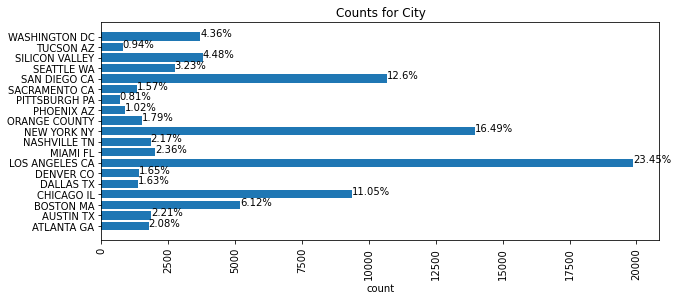

Gender


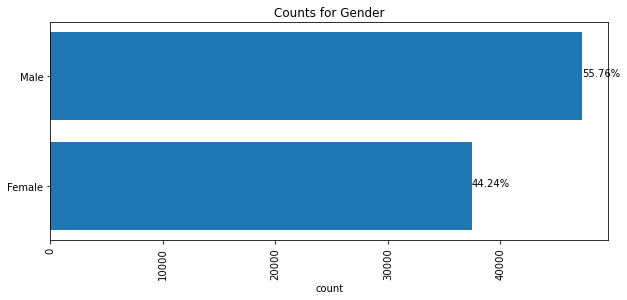

Payment_Mode


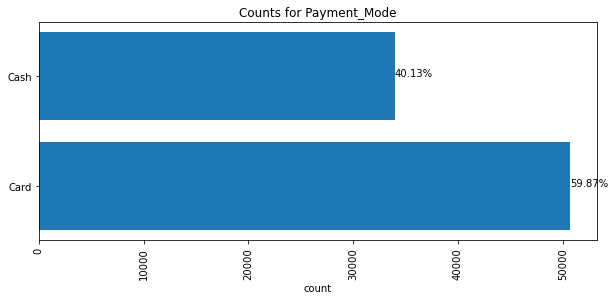

year


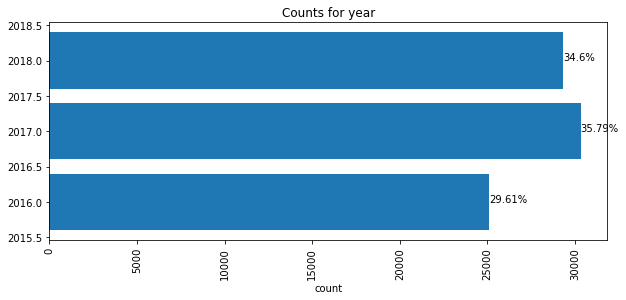

quarter


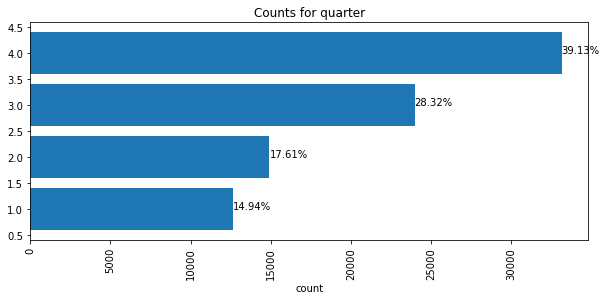

month


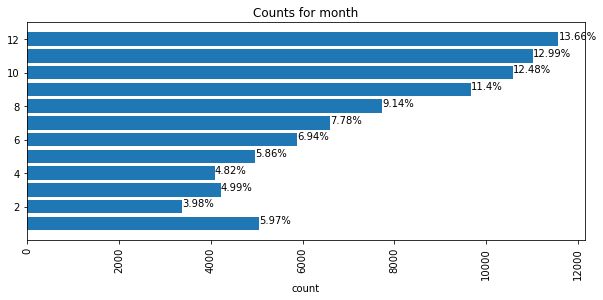

Yellow Cab
City


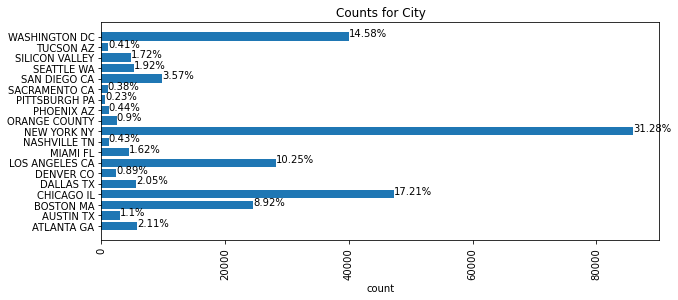

Gender


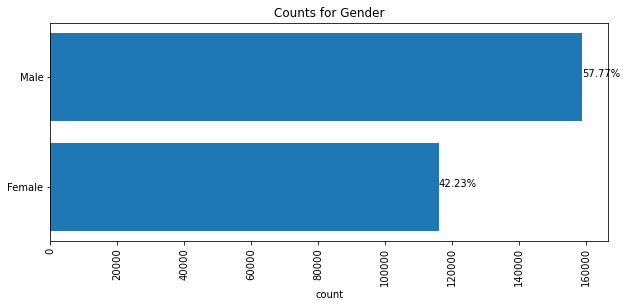

Payment_Mode


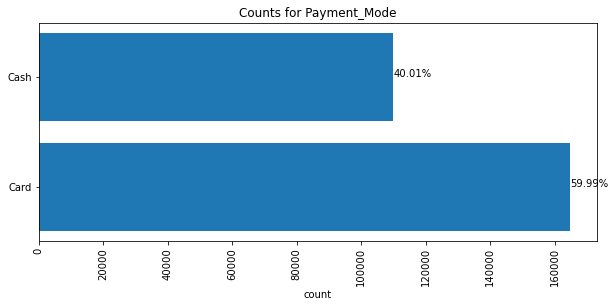

year


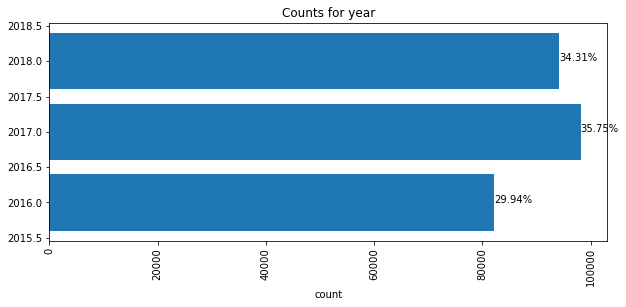

quarter


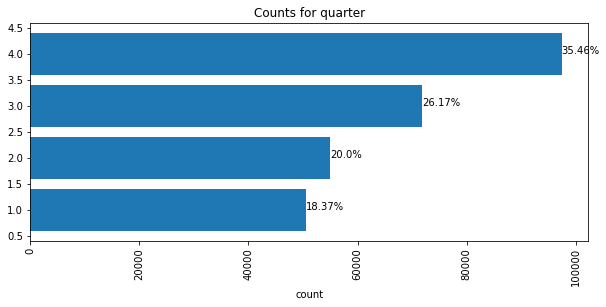

month


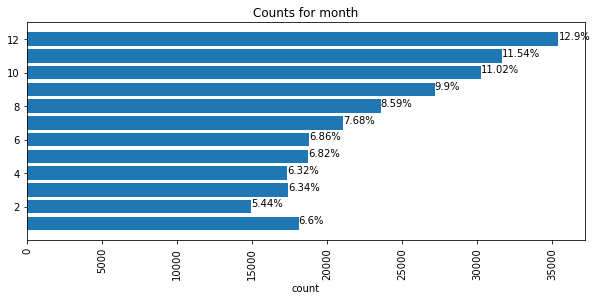

In [31]:
#value counts with bar graph
for df in [df_pink, df_yellow]:
    if df['Company'].unique()=='Pink Cab':
        print('Pink Cab')
    else:
        print('Yellow Cab')
    plot_catcols(cat_cols, df)


For column Company
Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64
None
Company


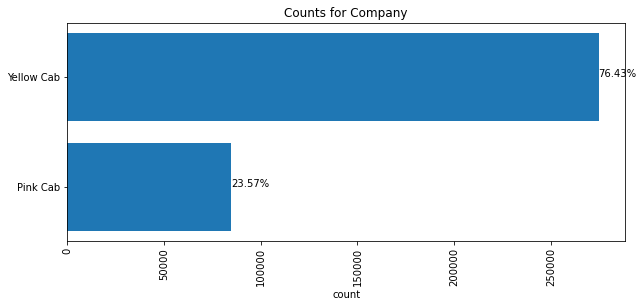

In [32]:
# number of transactions per company
print(count_value(master_data, ['Company']))
plot_catcols(['Company'], master_data)

In [33]:
#function for plotting a histogram for numerical columns
def plot_histogram(df, cols, bins=6):
    for col in cols:
        fig = plt.figure(figsize=(8,8))
        ax= fig.gca()
        df[col].plot.hist(ax = ax, bins = bins, color = 'blue')
        ax.set_title('Histogram of ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Number')
        plt.show()

Pink Cab


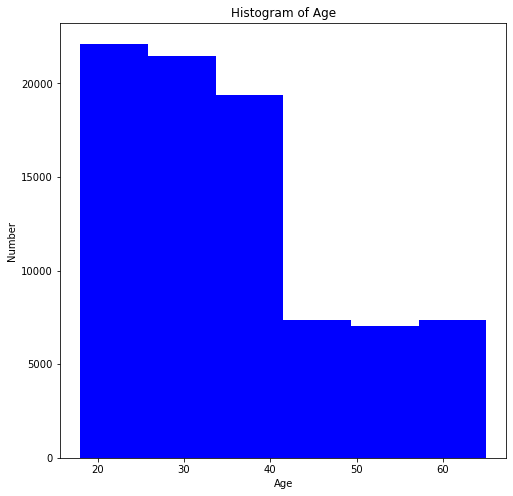

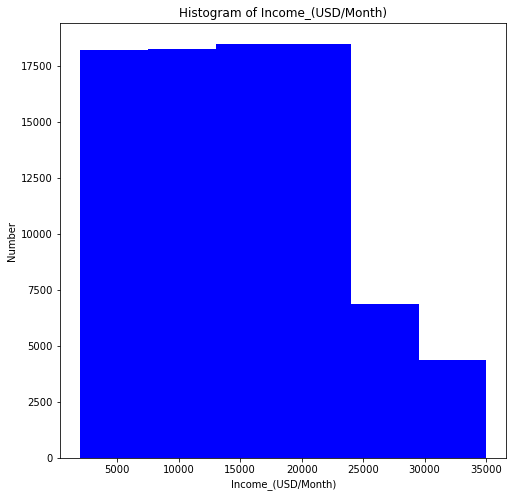

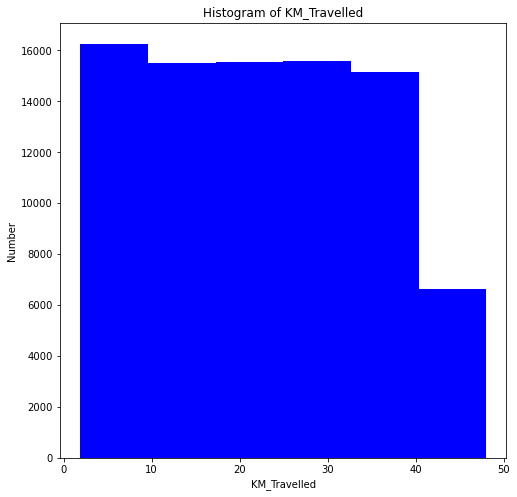

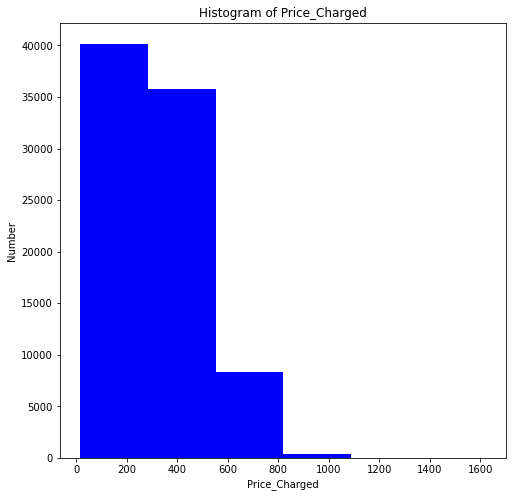

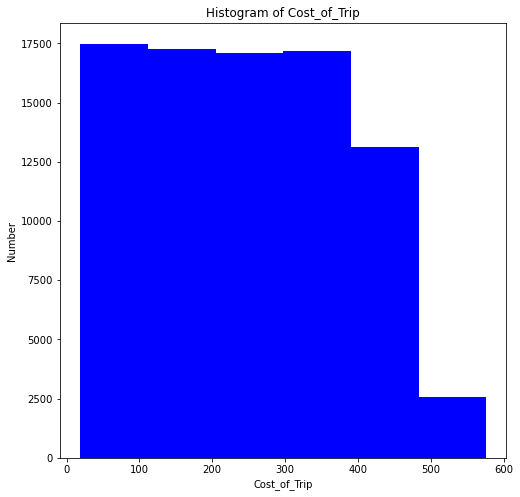

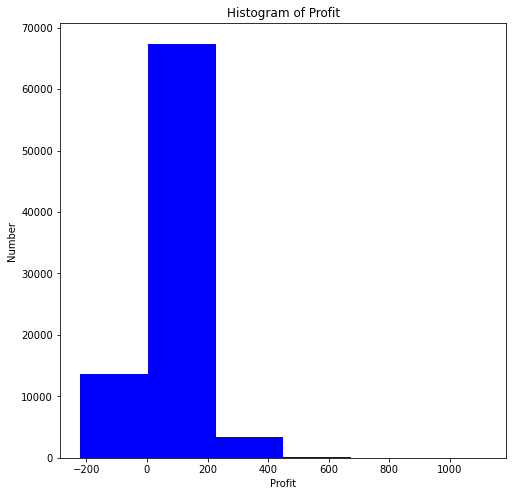

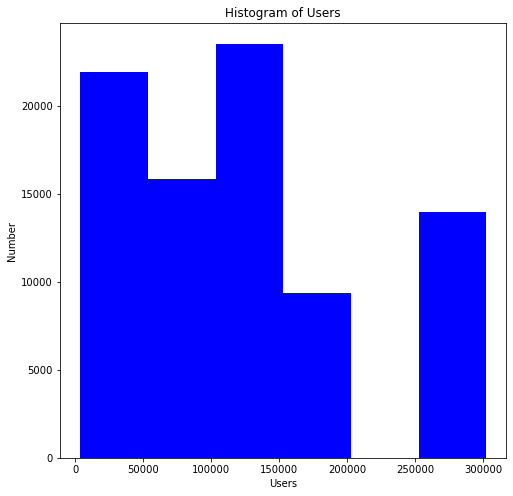

Yellow Cab


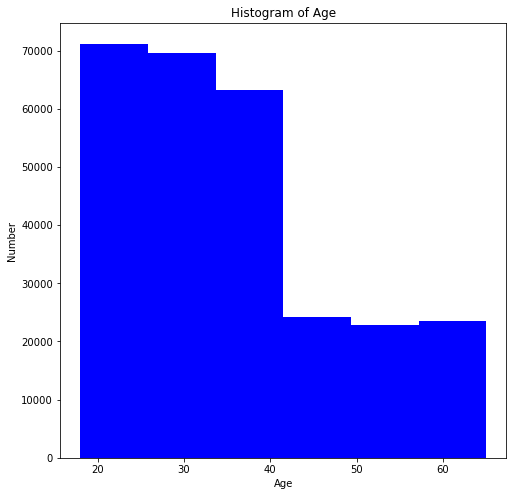

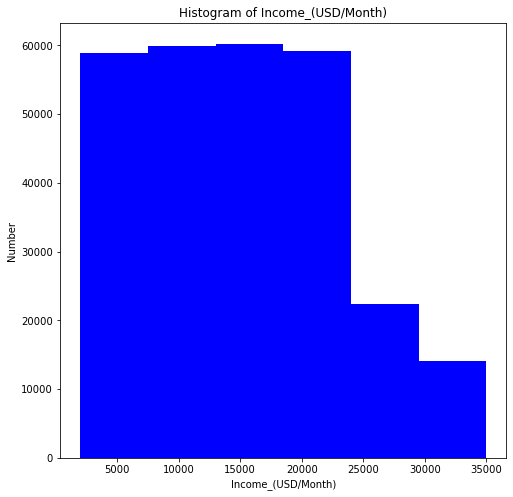

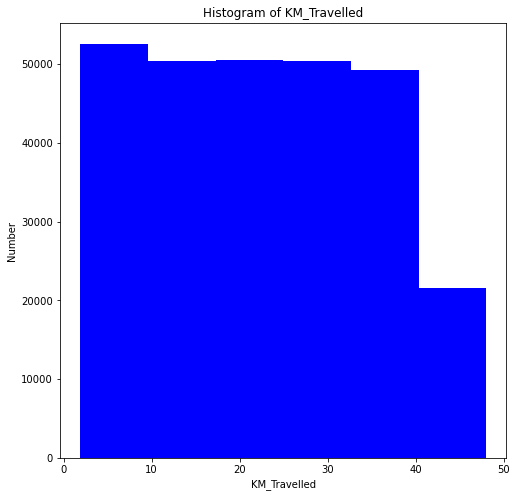

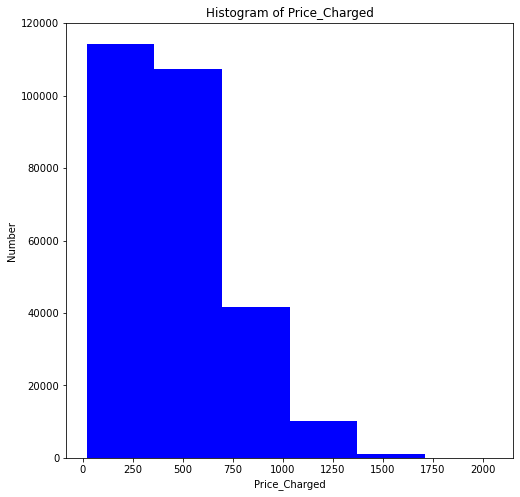

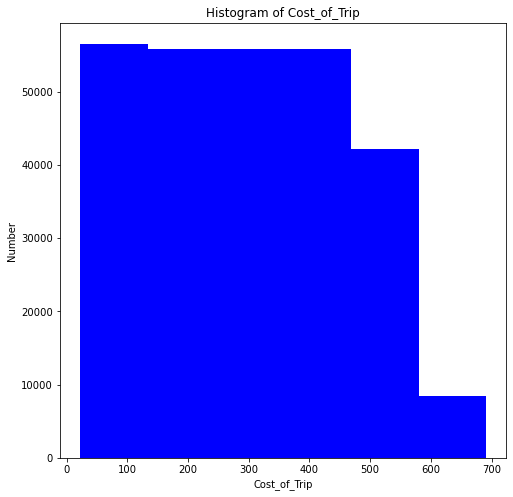

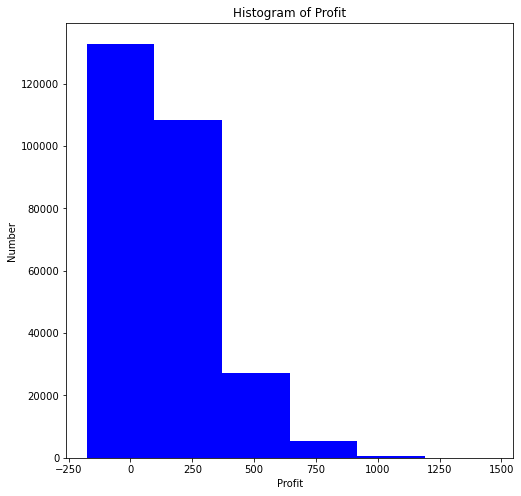

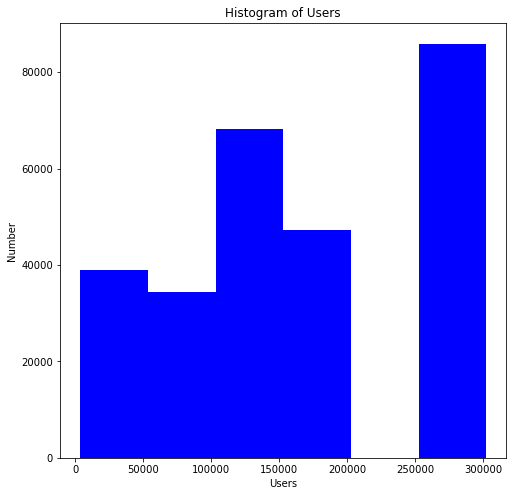

In [34]:
#histogram for numerical columns
for df in [df_pink, df_yellow]:
    if df['Company'].unique()=='Pink Cab':
        print('Pink Cab')
    else:
        print('Yellow Cab')
    plot_histogram(df, num_cols)

In [35]:
#function for bar plots for categorical columns against categorical columns
def plot_cols(x,y, df):
    df['dummy'] = np.ones(shape = df.shape[0])
    for col in x:
        for target_col in y:
            if target_col != col:
                print(col)
                counts = df[['dummy', col, target_col]].groupby([target_col, col], as_index = False).count()
                _ = plt.subplots(figsize = (10,4))
                #plotting first graph
                ax = plt.subplot(1, 2, 1)
                temp_0 = counts[counts[target_col] == master_data[target_col].unique()[0]][[col, 'dummy']]
                graph = plt.bar(temp_0[col], temp_0.dummy) #creating a graph
                plt.xticks(rotation=90)
                plt.title('Counts for ' + col + ' vs ' + master_data[target_col].unique()[0])
                plt.ylabel('count')
                #plotting second graph
                ax1 = plt.subplot(1, 2, 2)
                temp_1 = counts[counts[target_col] == master_data[target_col].unique()[1]][[col, 'dummy']]
                graph1 = plt.bar(temp_1[col], temp_1.dummy)
                plt.xticks(rotation=90)
                plt.title('Counts for ' + col +' vs ' + master_data[target_col].unique()[1] )
                plt.ylabel('count')
                plt.show()
            else:
                print('pass')
                print('\n')

Pink Cab
City


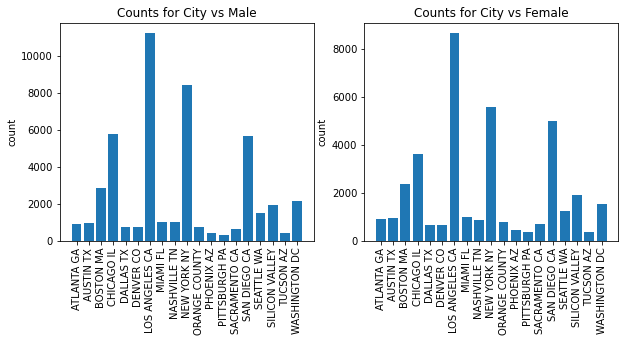

City


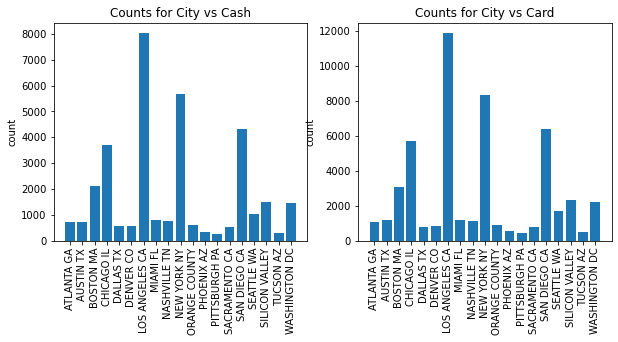

pass


Gender


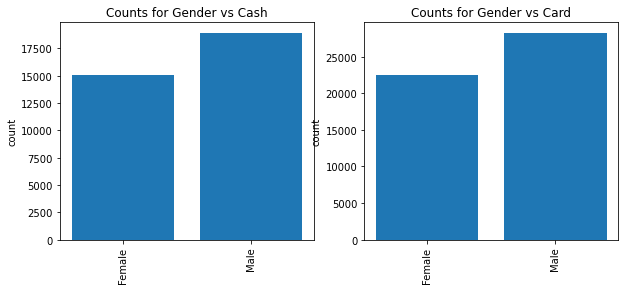

Payment_Mode


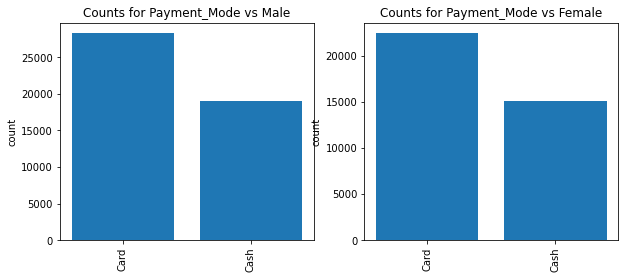

pass


year


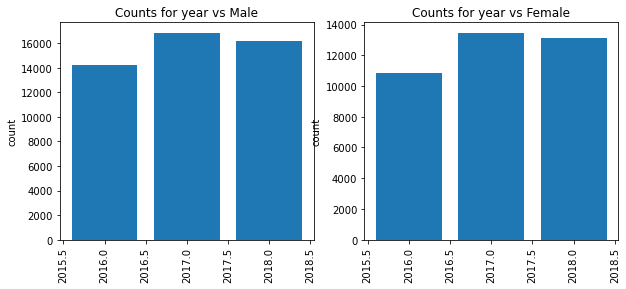

year


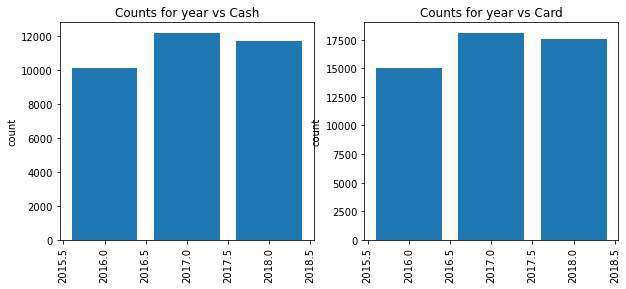

quarter


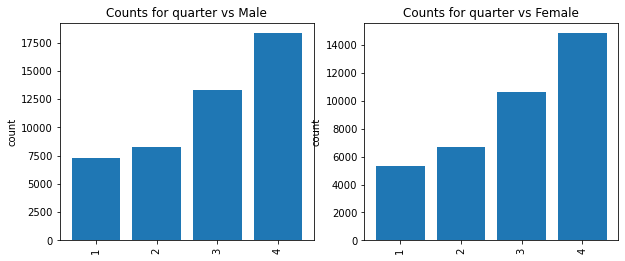

quarter


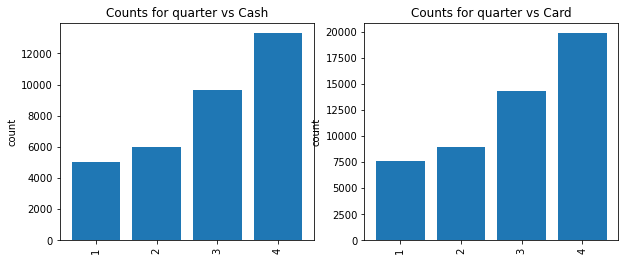

month


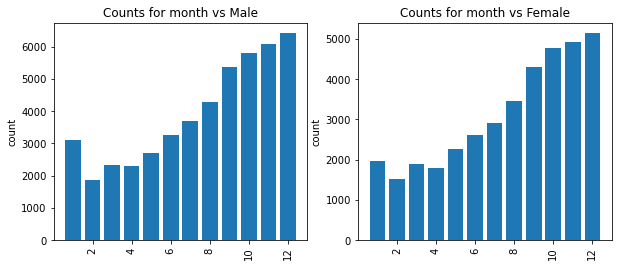

month


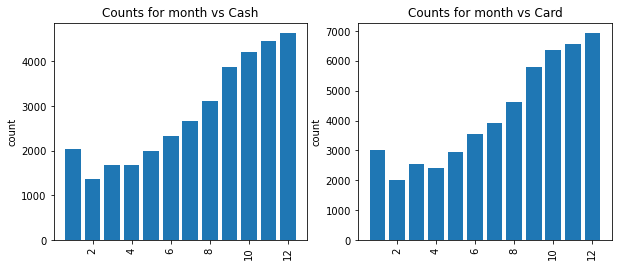

Yellow Cab
City


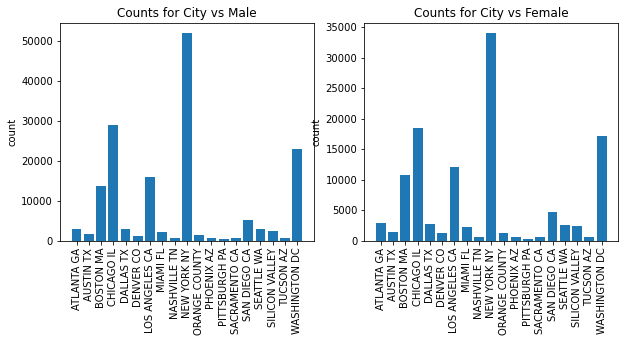

City


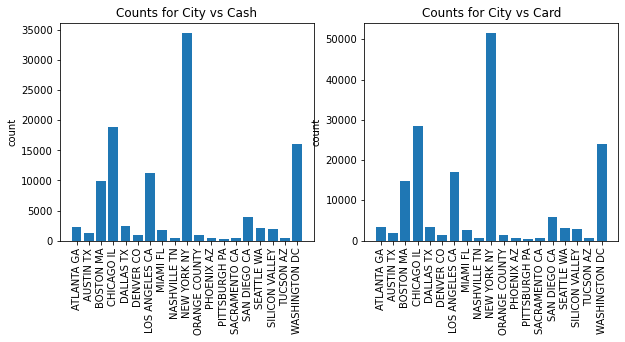

pass


Gender


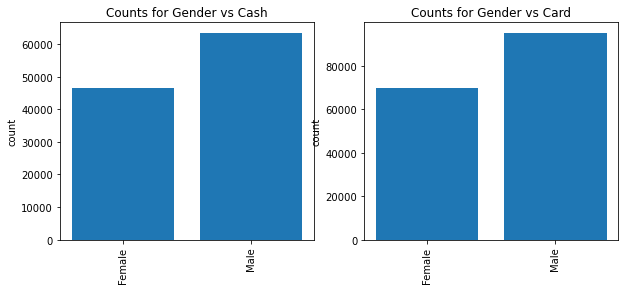

Payment_Mode


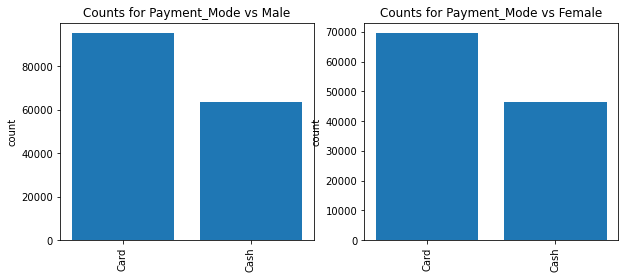

pass


year


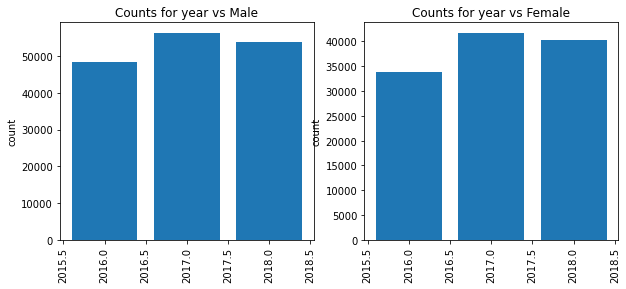

year


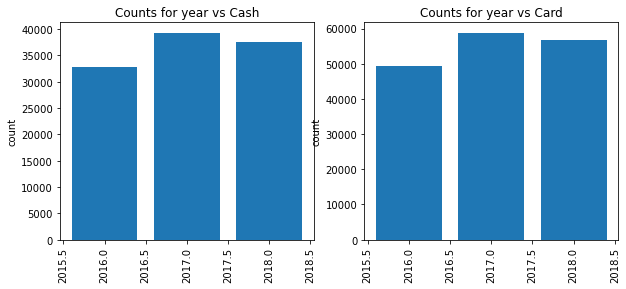

quarter


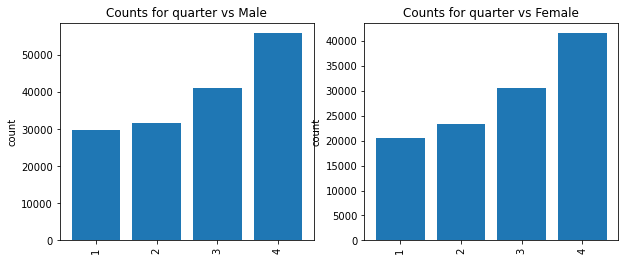

quarter


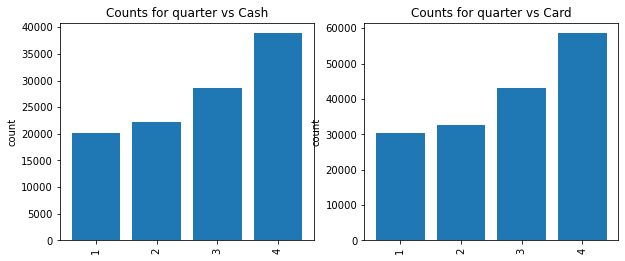

month


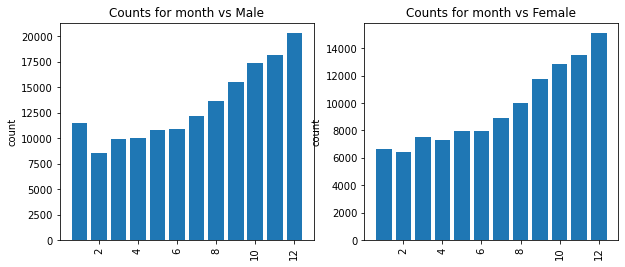

month


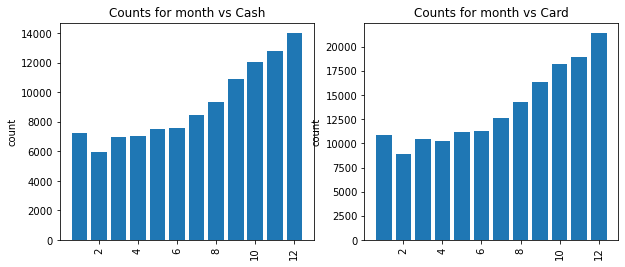

In [36]:
#separation by categorical columns
target_cols = ['Gender', 'Payment_Mode']
for df in [df_pink, df_yellow]:
    if df['Company'].unique()=='Pink Cab':
        print('Pink Cab')
    else:
        print('Yellow Cab')
    plot_cols(cat_cols, target_cols, df)


City


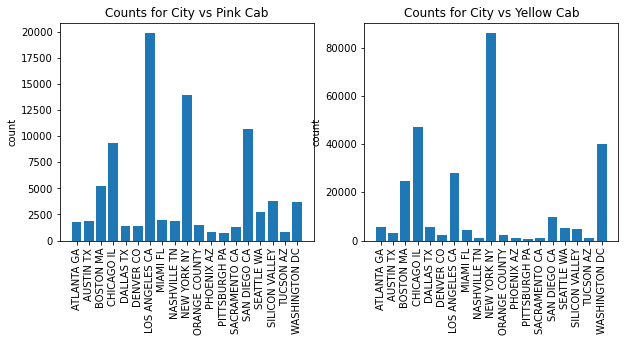

Gender


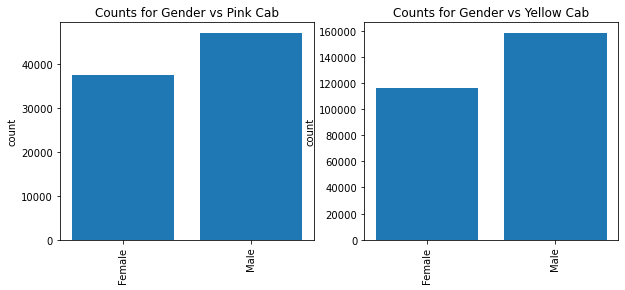

Payment_Mode


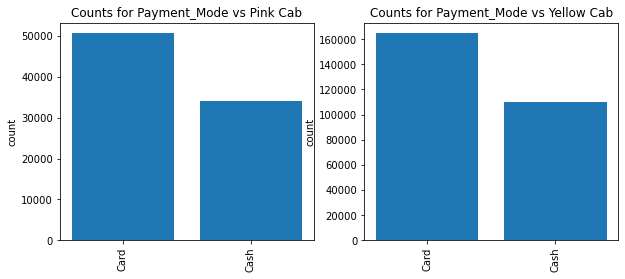

year


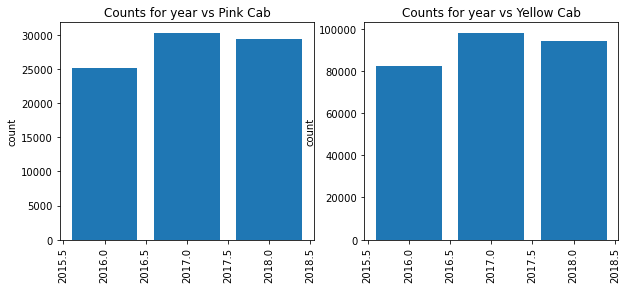

quarter


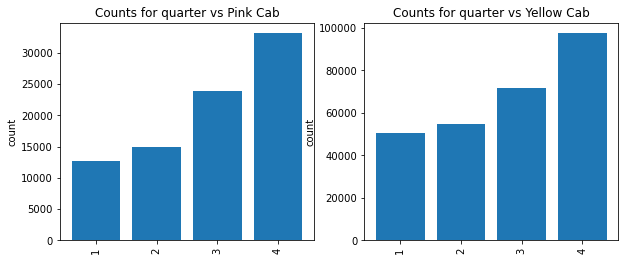

month


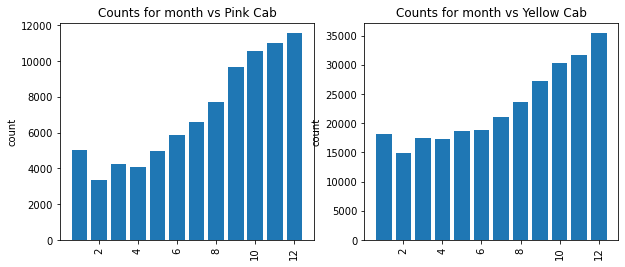

In [37]:
#separation of categorical columns by company
plot_cols(cat_cols, ['Company'], master_data)

In [38]:
#function to visualize categorical separation by numerical features
def box_plot(df, num_cols, cat_cols):
    for num_col in num_cols:
        for cat_col in cat_cols:
            print('\n')
            print('For '+ num_col + ' vs ' + cat_col)
            sns.set_style("whitegrid")
            sns.boxplot(x=cat_col, y=num_col, data=df)
            plt.xlabel(cat_col) # Set text for the x axis
            plt.ylabel(num_col)# Set text for y axis
            plt.show()

Pink Cab


For Age vs City


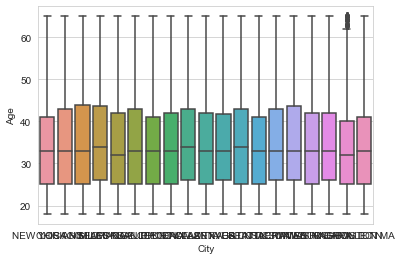



For Age vs Gender


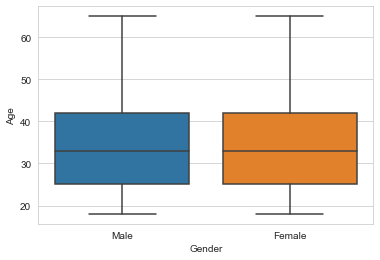



For Age vs Payment_Mode


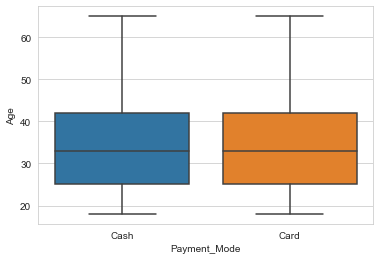



For Age vs year


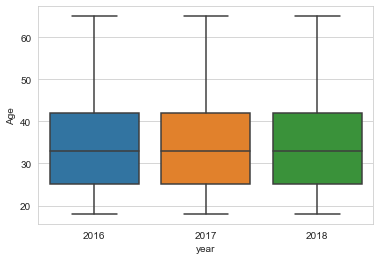



For Age vs quarter


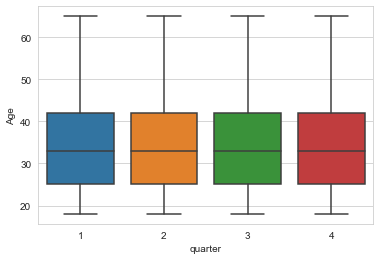



For Age vs month


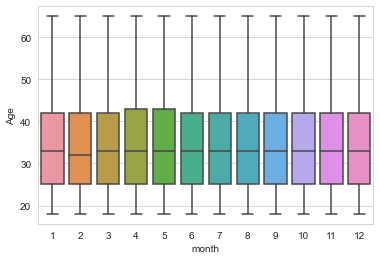



For Income_(USD/Month) vs City


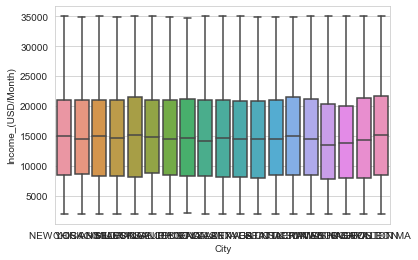



For Income_(USD/Month) vs Gender


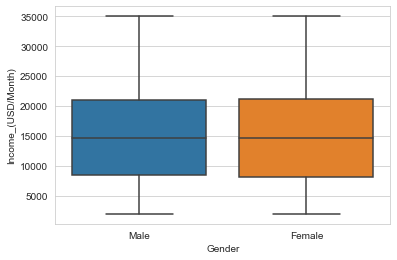



For Income_(USD/Month) vs Payment_Mode


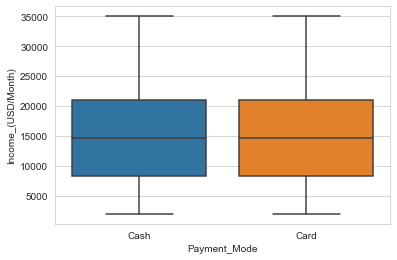



For Income_(USD/Month) vs year


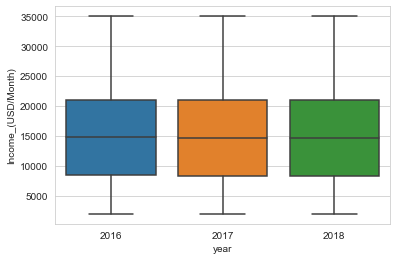



For Income_(USD/Month) vs quarter


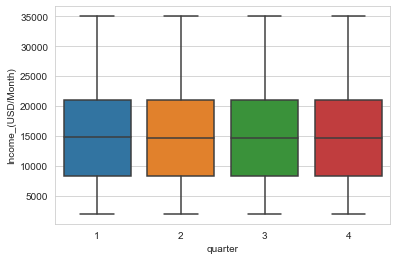



For Income_(USD/Month) vs month


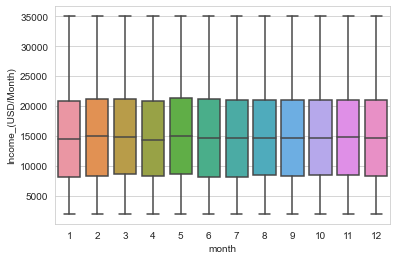



For KM_Travelled vs City


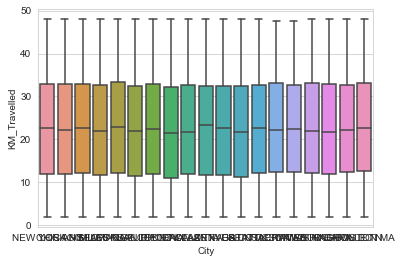



For KM_Travelled vs Gender


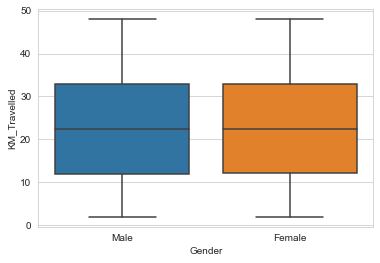



For KM_Travelled vs Payment_Mode


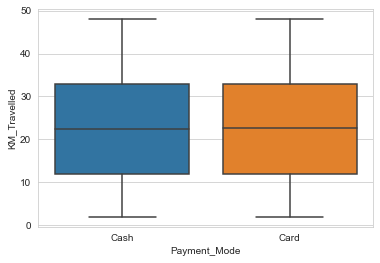



For KM_Travelled vs year


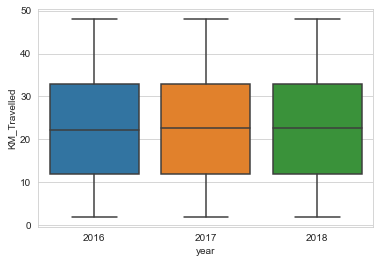



For KM_Travelled vs quarter


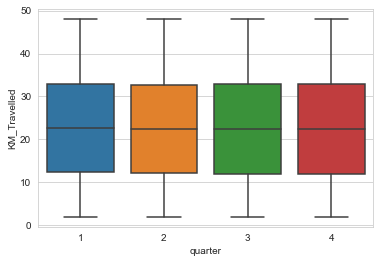



For KM_Travelled vs month


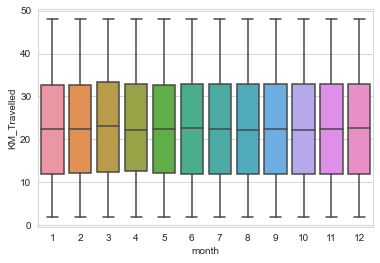



For Price_Charged vs City


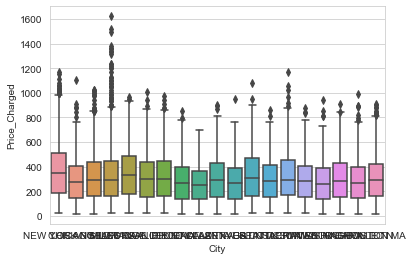



For Price_Charged vs Gender


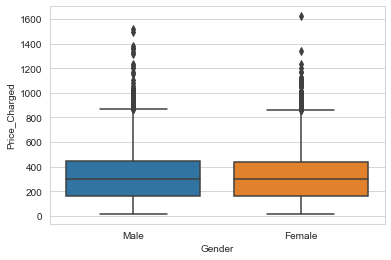



For Price_Charged vs Payment_Mode


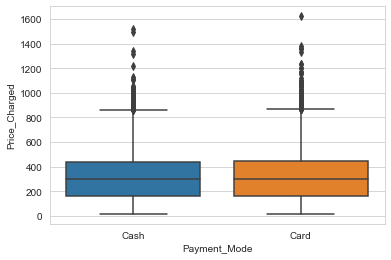



For Price_Charged vs year


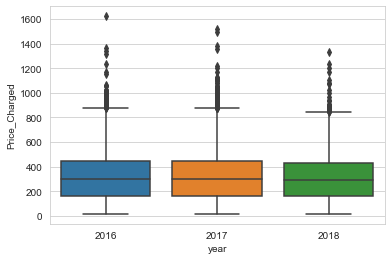



For Price_Charged vs quarter


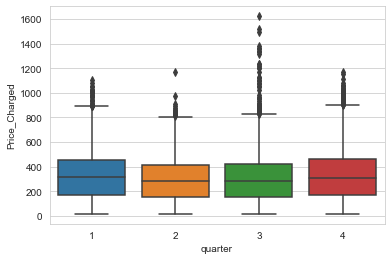



For Price_Charged vs month


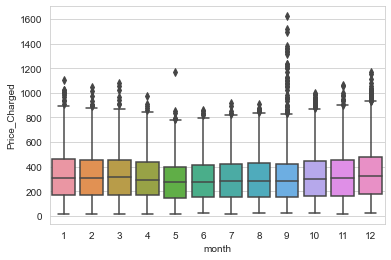



For Cost_of_Trip vs City


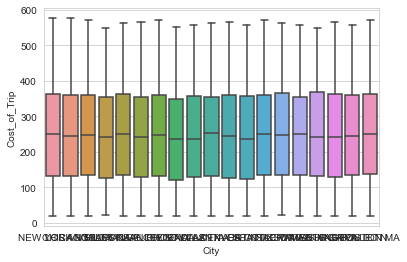



For Cost_of_Trip vs Gender


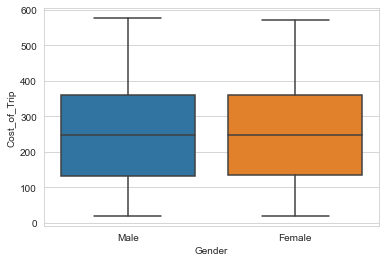



For Cost_of_Trip vs Payment_Mode


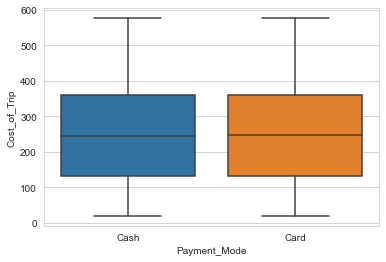



For Cost_of_Trip vs year


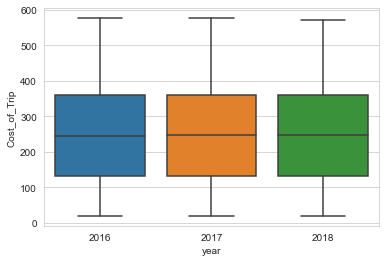



For Cost_of_Trip vs quarter


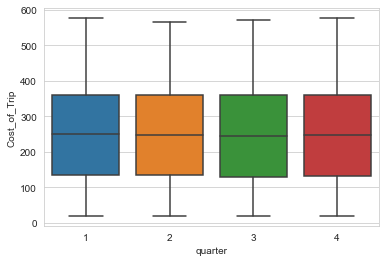



For Cost_of_Trip vs month


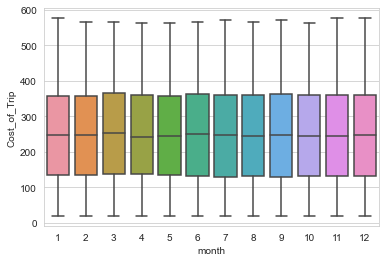



For Profit vs City


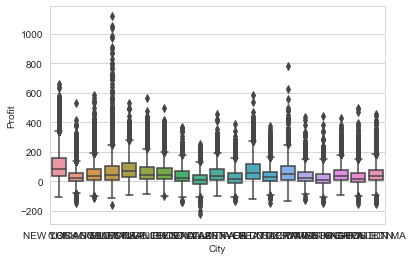



For Profit vs Gender


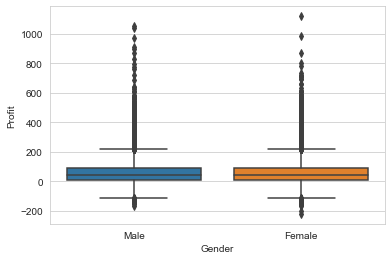



For Profit vs Payment_Mode


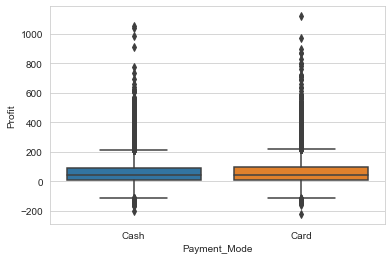



For Profit vs year


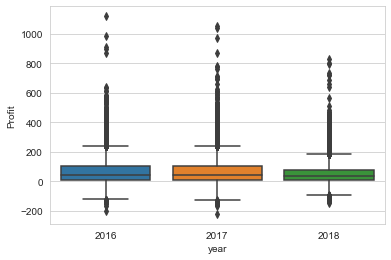



For Profit vs quarter


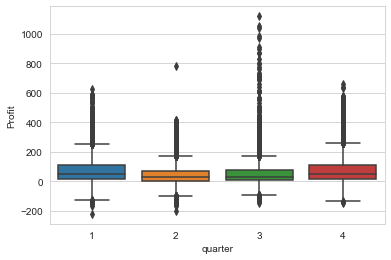



For Profit vs month


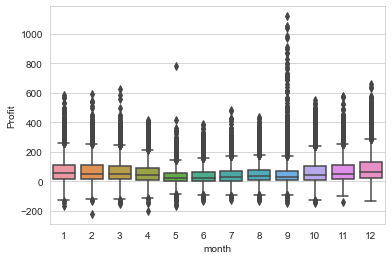



For Users vs City


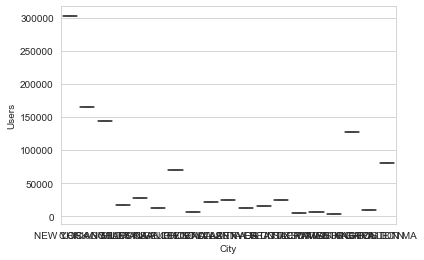



For Users vs Gender


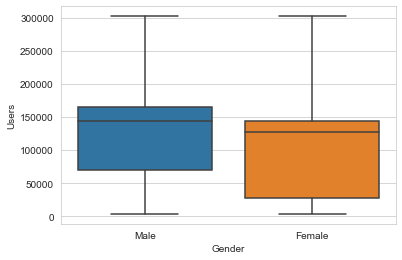



For Users vs Payment_Mode


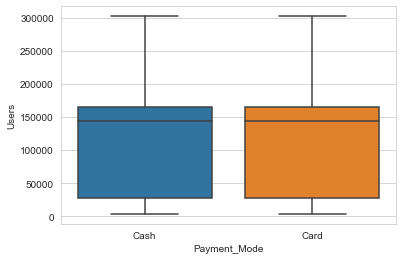



For Users vs year


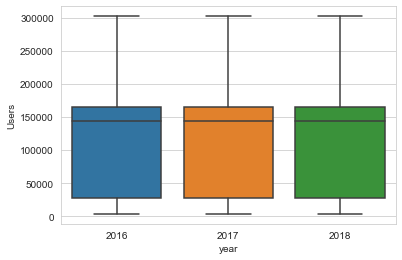



For Users vs quarter


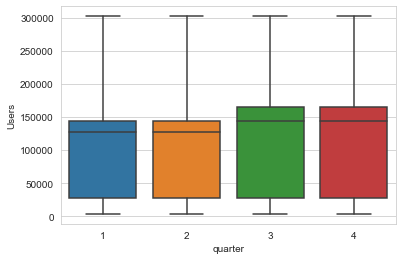



For Users vs month


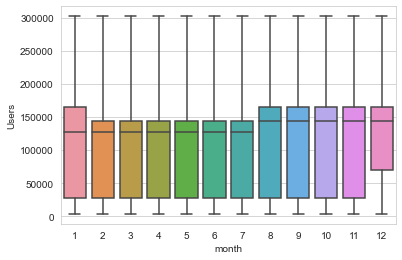

Yellow Cab


For Age vs City


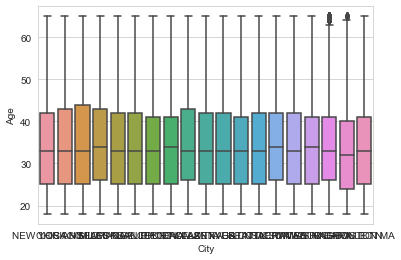



For Age vs Gender


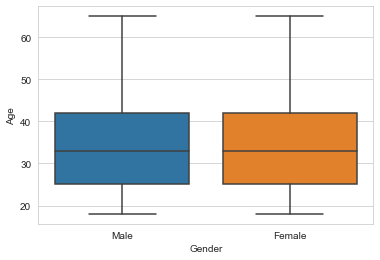



For Age vs Payment_Mode


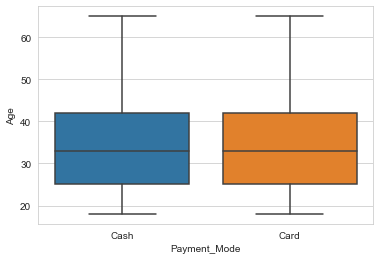



For Age vs year


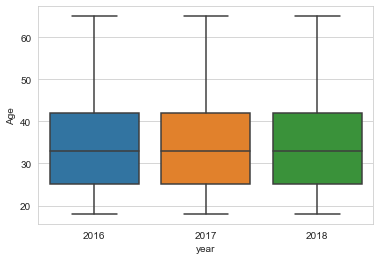



For Age vs quarter


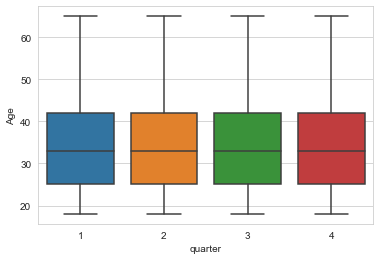



For Age vs month


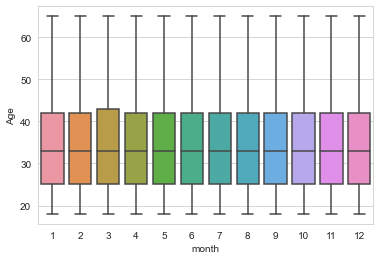



For Income_(USD/Month) vs City


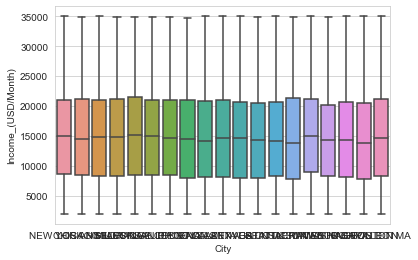



For Income_(USD/Month) vs Gender


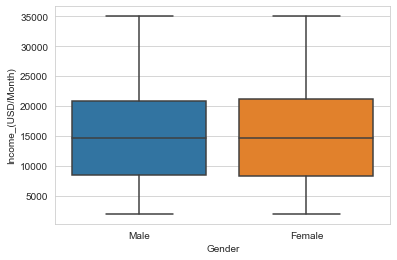



For Income_(USD/Month) vs Payment_Mode


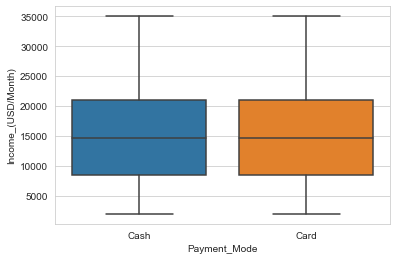



For Income_(USD/Month) vs year


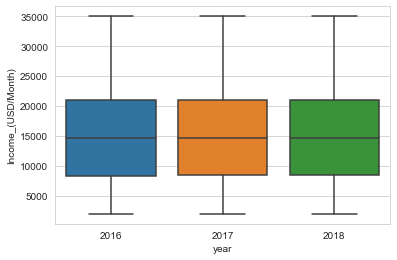



For Income_(USD/Month) vs quarter


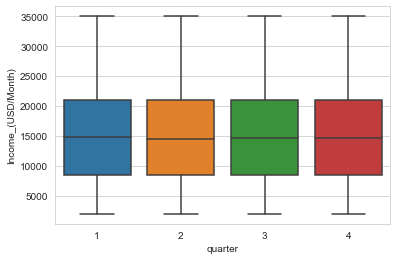



For Income_(USD/Month) vs month


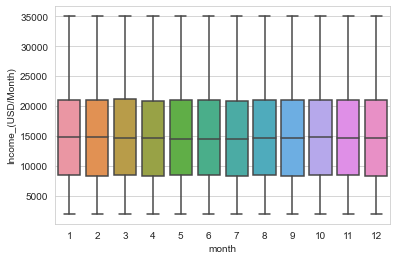



For KM_Travelled vs City


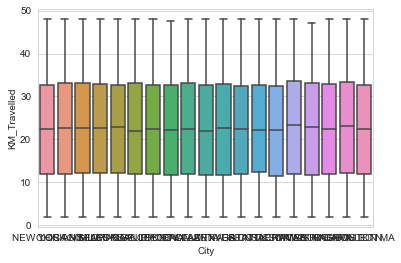



For KM_Travelled vs Gender


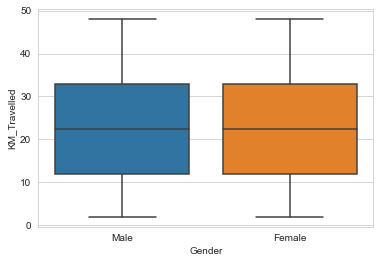



For KM_Travelled vs Payment_Mode


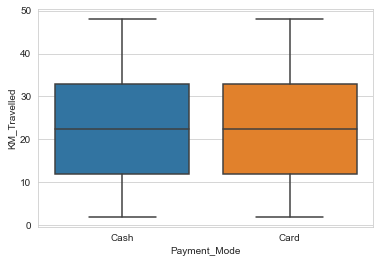



For KM_Travelled vs year


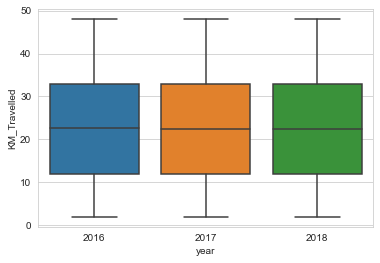



For KM_Travelled vs quarter


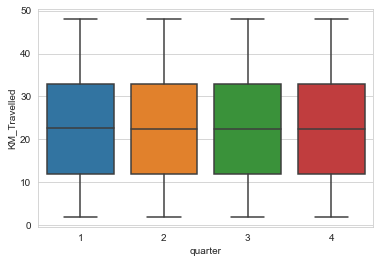



For KM_Travelled vs month


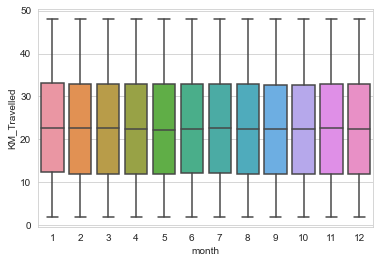



For Price_Charged vs City


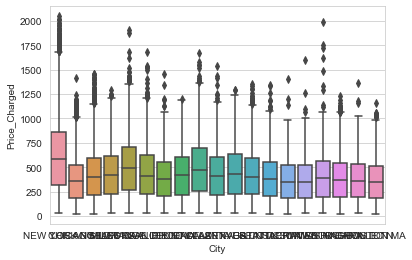



For Price_Charged vs Gender


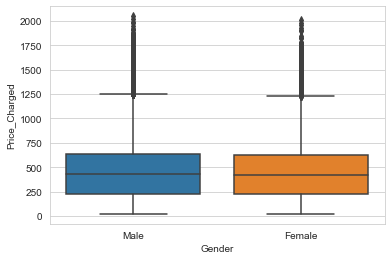



For Price_Charged vs Payment_Mode


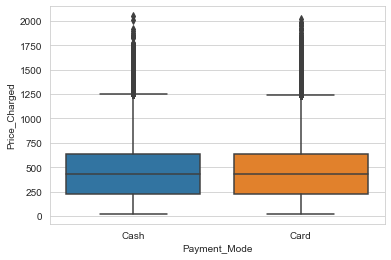



For Price_Charged vs year


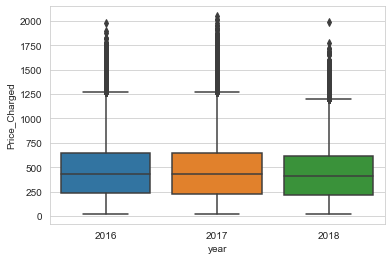



For Price_Charged vs quarter


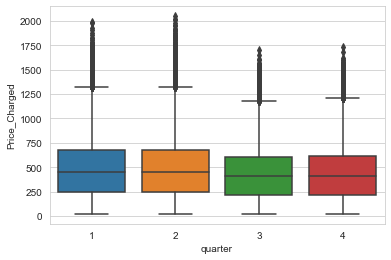



For Price_Charged vs month


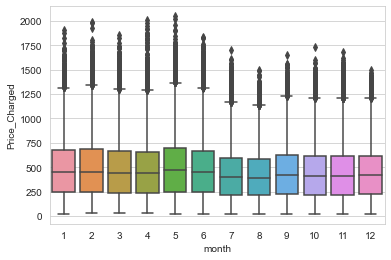



For Cost_of_Trip vs City


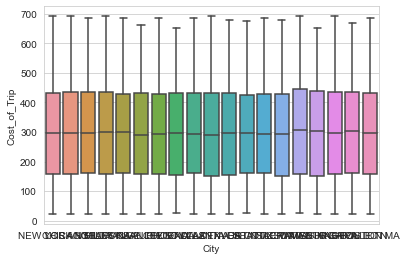



For Cost_of_Trip vs Gender


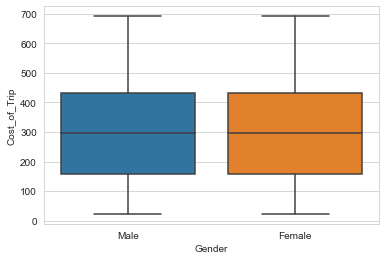



For Cost_of_Trip vs Payment_Mode


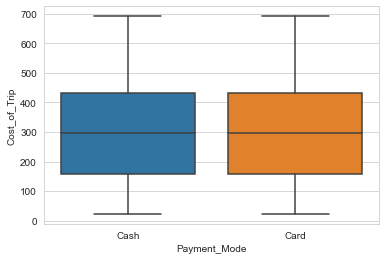



For Cost_of_Trip vs year


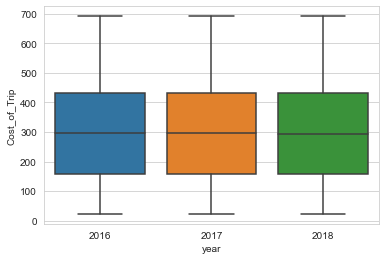



For Cost_of_Trip vs quarter


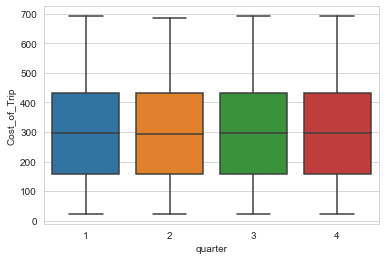



For Cost_of_Trip vs month


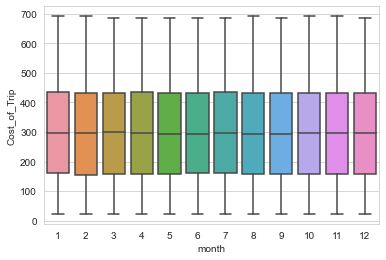



For Profit vs City


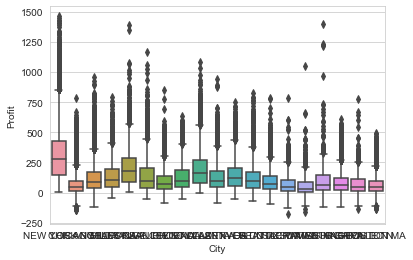



For Profit vs Gender


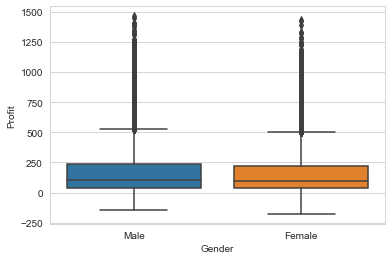



For Profit vs Payment_Mode


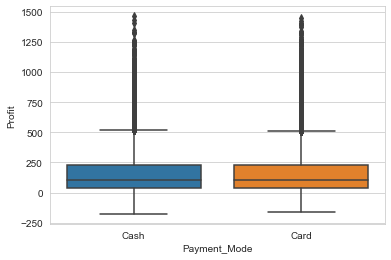



For Profit vs year


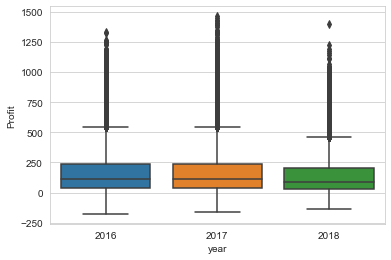



For Profit vs quarter


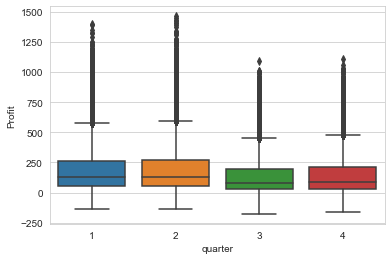



For Profit vs month


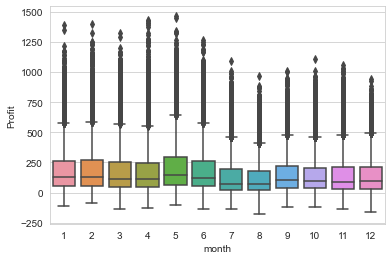



For Users vs City


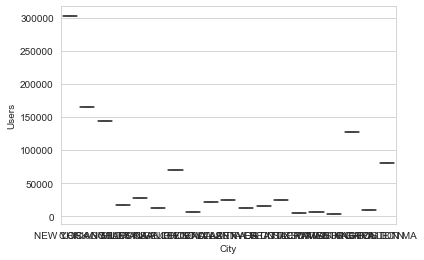



For Users vs Gender


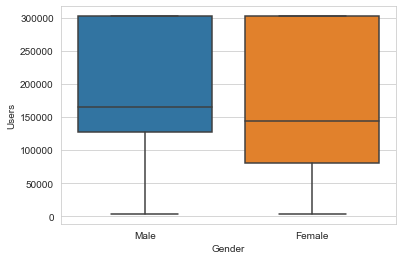



For Users vs Payment_Mode


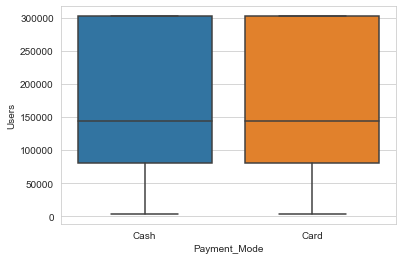



For Users vs year


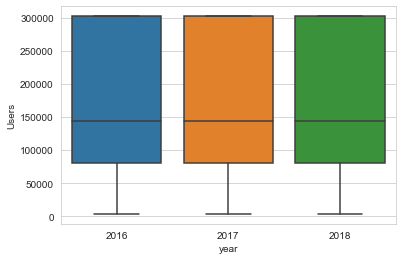



For Users vs quarter


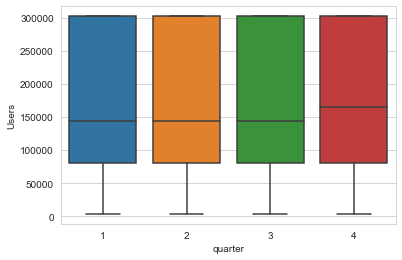



For Users vs month


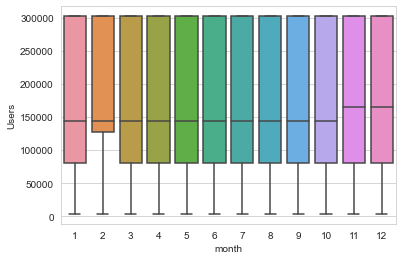

In [39]:
#separation by numerical features
for df in [df_pink, df_yellow]:
    if df['Company'].unique()=='Pink Cab':
        print('Pink Cab')
    else:
        print('Yellow Cab')
    box_plot(df, num_cols, cat_cols)



For Age vs Company


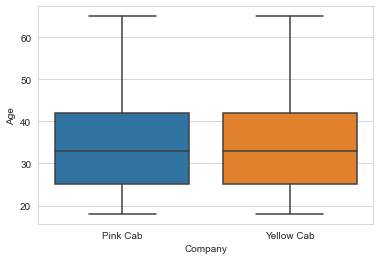



For Income_(USD/Month) vs Company


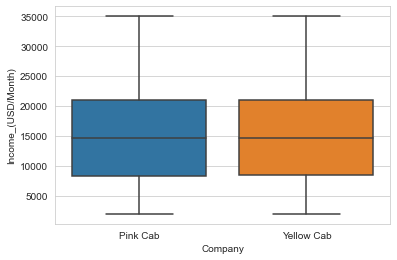



For KM_Travelled vs Company


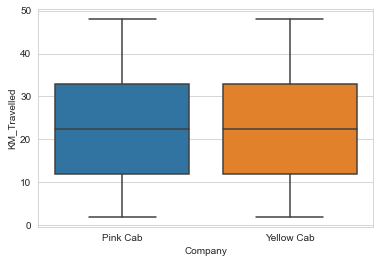



For Price_Charged vs Company


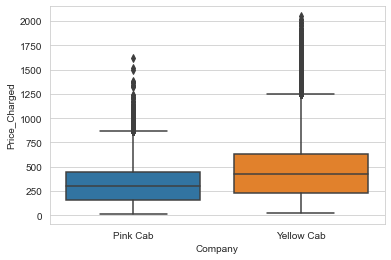



For Cost_of_Trip vs Company


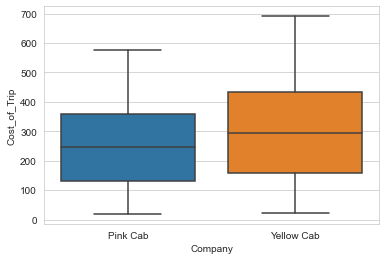



For Profit vs Company


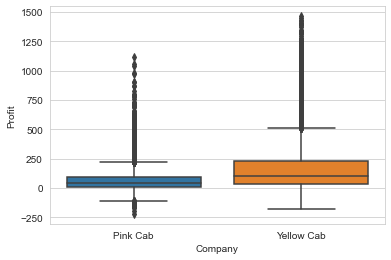



For Users vs Company


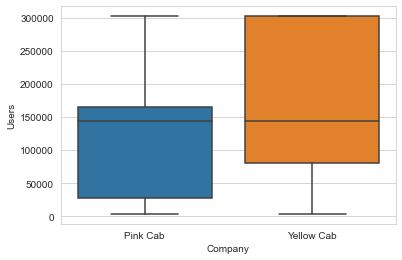

In [40]:
#company separation by numerical features
box_plot(master_data,num_cols, ['Company'])

In [41]:
#creating in column  and users per company
datasets=[df_pink, df_yellow]
for df in datasets:
    df['Users_per_company']=df['Customer_ID'].nunique()

In [42]:
#unique transcations per company
for df in [df_pink, df_yellow]:
    if df['Company'].unique()=='Pink Cab':
        print('Pink Cab')
    else:
        print('Yellow Cab')
    #getting total transactions
    print('Total transactions')
    print(df['Transaction_ID'].nunique())
    #getting amount of transactions from unique customers
    print('Amount transctions from unique customers')
    print(df['Customer_ID'].nunique())
    #getting % of transctions from unique customers out of total transactions
    print('% of unique customers')
    print((df['Customer_ID'].nunique()/df['Transaction_ID'].nunique())*100)

Pink Cab
Total transactions
84711
Amount transctions from unique customers
32330
% of unique customers
38.165055305686394
Yellow Cab
Total transactions
274681
Amount transctions from unique customers
39896
% of unique customers
14.524484765964882


In [43]:
#grouping df_pink and df_yellow by year
for df in [df_pink, df_yellow]:
    df = df#creating a dataframe
    df = df.groupby(['year'])#grouping by year
    df_16 = df.get_group( 2016)#getting dataframe for 2016
    df_17 = df.get_group(2017)#getting dataframe forin 2017
    df_18 = df.get_group( 2018)#getting dataframe for 2018
    sets = [df_16,df_17,df_18]
    for df in sets:
        df['Users_per_company']=df['Customer_ID'].nunique()#creating columns for users per company
        #getting more insights in profit,price charged and cost of trip by company and year
        for col in ['Profit', 'Price_Charged', 'Cost_of_Trip']:
            if df['year'].unique()==2016:
                year=2016
            elif df['year'].unique()==2017:
                year=2017
            else:
                year=2018
            cab = 'Pink Cab'
            if cab  in df['Company'].unique().tolist():
                cab = 'Pink Cab'
            else:
                cab = 'Yellow Cab'
            print(col+' for '+cab+' '+str(year))
            print(df[col].describe())#summary of the columns for by year
#creating new variables to be used for line plot
    if df['Company'].unique()=='Pink Cab':
        df_p16=df_16
        df_p17=df_17
        df_p18=df_18
    else:
        df_y16=df_16
        df_y17=df_17
        df_y18=df_18


Profit for Pink Cab 2016
count    25080.000000
mean        68.321819
std         82.691391
min       -198.698000
25%         13.047500
50%         46.092000
75%        103.670000
max       1119.480000
Name: Profit, dtype: float64
Price_Charged for Pink Cab 2016
count    25080.000000
mean       315.330113
std        186.778878
min         16.380000
25%        161.160000
50%        301.700000
75%        447.840000
max       1623.480000
Name: Price_Charged, dtype: float64
Cost_of_Trip for Pink Cab 2016
count    25080.000000
mean       247.008294
std        135.404597
min         19.000000
25%        130.896000
50%        244.419000
75%        359.856000
max        576.000000
Name: Cost_of_Trip, dtype: float64
Profit for Pink Cab 2017
count    30321.000000
mean        67.070839
std         84.074658
min       -220.060000
25%         10.958000
50%         44.180000
75%        102.122000
max       1056.110000
Name: Profit, dtype: float64
Price_Charged for Pink Cab 2017
count    30321.000000


Profit
Yearly Profit analysis


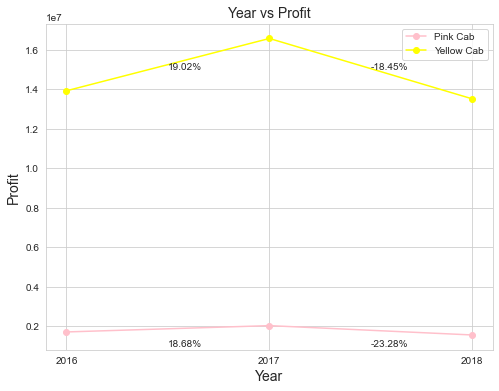

Price_Charged
Yearly Price_Charged analysis


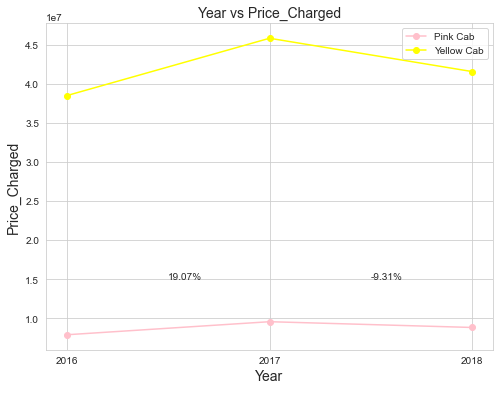

Cost_of_Trip
Yearly Cost_of_Trip analysis


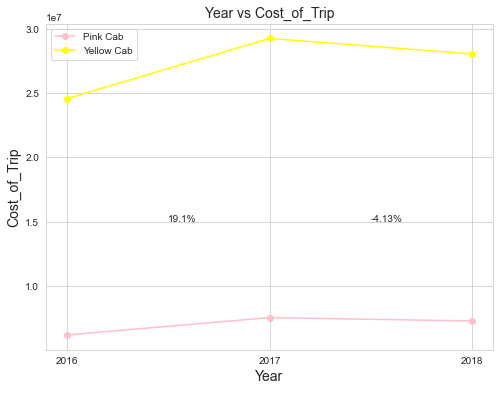

Users_per_company
Yearly Users_per_company analysis


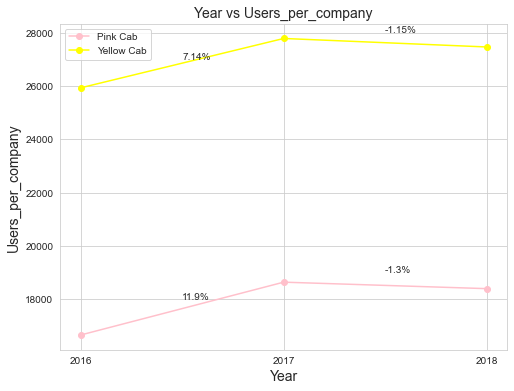

In [44]:
#creating line plot for yearly profit, price charged and cost of trip analysis
def line_plot(col):
#getting total amount of the values
    if col != 'Users_per_company':
        p2016 = df_p16[col].sum()
        y2016 = df_y16[col].sum()
        p2017 = df_p17[col].sum()
        y2017 = df_y17[col].sum()
        p2018 = df_p18[col].sum()
        y2018 = df_y18[col].sum()
    else:
        p2016 = df_p16['Users_per_company'].unique().tolist()[0]
        y2016 = df_y16['Users_per_company'].unique().tolist()[0]
        p2017 = df_p17['Users_per_company'].unique().tolist()[0]
        y2017 = df_y17['Users_per_company'].unique().tolist()[0]
        p2018 = df_p18['Users_per_company'].unique().tolist()[0]
        y2018 = df_y18['Users_per_company'].unique().tolist()[0]
# % increase or decrease of profit, price charge and cost of trip from year to year
    p_increase=round(((p2017-p2016)/p2016)*100,2) #calculating %increase of pink cab between 2016 and 2017
    y_increase=round(((y2017-y2016)/y2016)*100,2) #calculating %increase of yellow cab between 2016 and 2017
    p_decrease=round(((p2018-p2017)/p2017)*100,2)  #calculating %decrease of pink cab between 2017 and 2018
    y_decrease=round(((y2018-y2017)/y2017)*100,2) #calculating %increase of yellow cab between 2017and 2018
    Data_p = {'Year': ['2016', '2017', '2018'],
               col: [p2016, p2017, p2018]}
    df_p = pd.DataFrame(Data_p,columns=['Year',col])#dataframe for pink cab
    Data_y = {'Year': ['2016', '2017', '2018'],
               col: [y2016, y2017, y2018]}
    df_y = pd.DataFrame(Data_y,columns=['Year',col])#dataframe for yellow cab
    print('Yearly ' +col+' analysis')
    fig, ax = plt.subplots(figsize=(8,6))#creating subplots
    ax.plot(df_p['Year'], df_p[col], color='pink', marker='o', label='Pink Cab')#line plot for pink cab
    ax.plot(df_y['Year'], df_y[col], color='yellow', marker='o', label='Yellow Cab')#line plot for yellow cab
    if col != 'Users_per_company':
        ax.annotate(str(p_increase)+'%', xy=(0.5,0.1e7))
        ax.annotate(str(y_increase)+'%', xy=(0.5,1.5e7))
        ax.annotate(str(p_decrease)+'%', xy=(1.5,0.1e7))
        ax.annotate(str(y_decrease)+'%', xy=(1.5,1.5e7))
        plt.title('Year vs '+ col, fontsize=14)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel(col, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        ax.annotate(str(p_increase)+'%', xy=(0.5,18e3))
        ax.annotate(str(y_increase)+'%', xy=(0.5,27e3))
        ax.annotate(str(p_decrease)+'%', xy=(1.5,19e3))
        ax.annotate(str(y_decrease)+'%', xy=(1.5,28e3))
        plt.title('Year vs '+ 'Users_per_company', fontsize=14)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Users_per_company', fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()
cols = ['Profit', 'Price_Charged', 'Cost_of_Trip', 'Users_per_company'] 
for col in cols:
    print(col)
    line_plot(col)

In [45]:
# creating a correlation matrix
# get correlations
corr = master_data[num_cols].corr()
corr

,Age,Income_(USD/Month),KM_Travelled,Price_Charged,Cost_of_Trip,Profit,Users
Age,1.000000,0.003907,-0.000369,-0.003084,-0.000189,-0.005093,-0.005906
Income_(USD/Month),0.003907,1.000000,-0.000544,0.003228,-0.000633,0.006148,0.010464
KM_Travelled,-0.000369,-0.000544,1.000000,0.835753,0.981848,0.462768,-0.000428
Price_Charged,-0.003084,0.003228,0.835753,1.000000,0.859812,0.864154,0.281061
Cost_of_Trip,-0.000189,-0.000633,0.981848,0.859812,1.000000,0.486056,0.023628
Profit,-0.005093,0.006148,0.462768,0.864154,0.486056,1.000000,0.457758
Users,-0.005906,0.010464,-0.000428,0.281061,0.023628,0.457758,1.000000


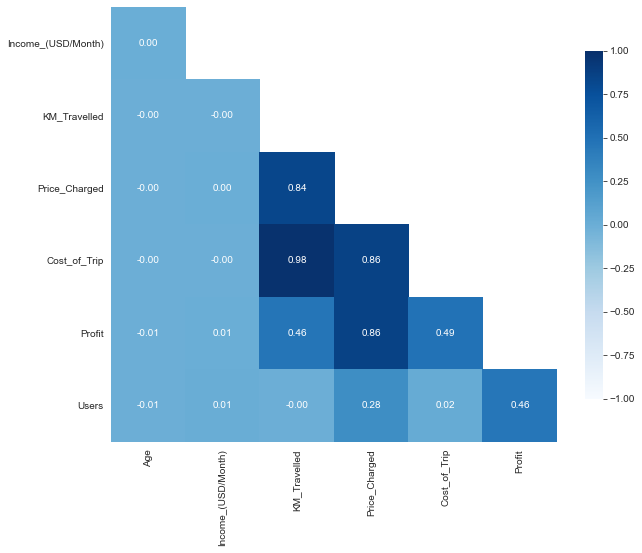

In [46]:
#creating a heatmap
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# adjusting mask and df
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()
# plotting heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

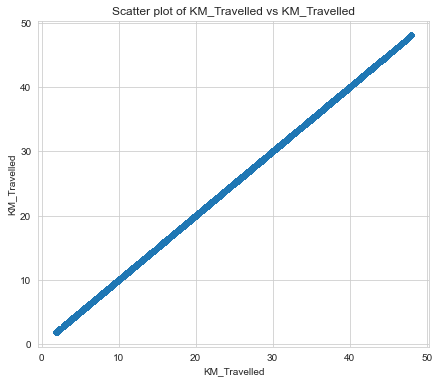

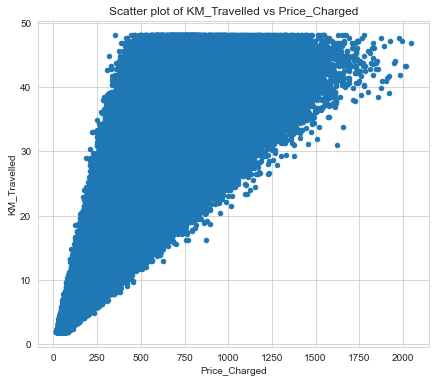

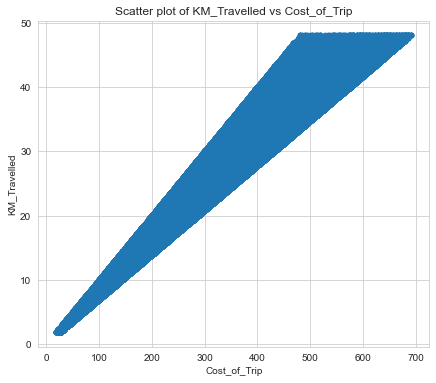

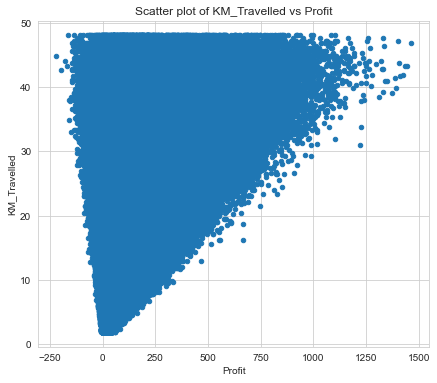

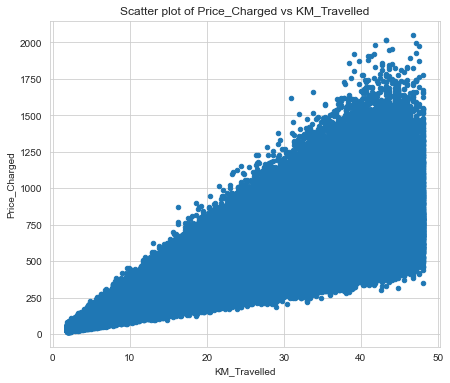

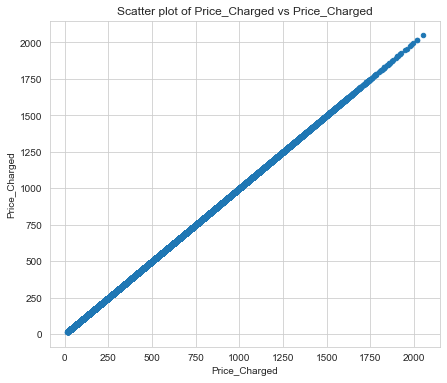

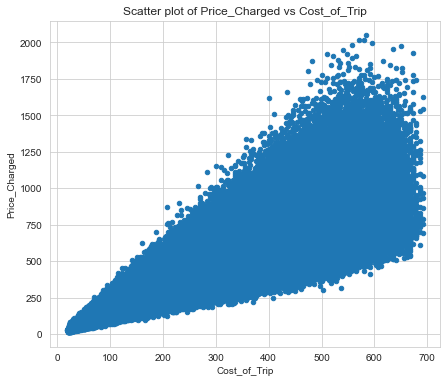

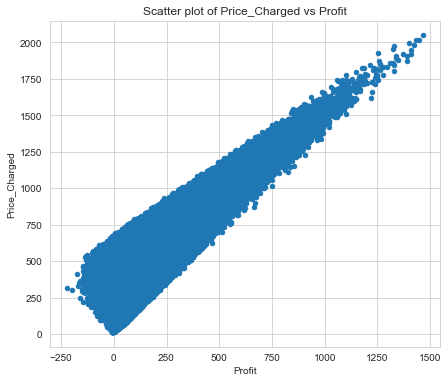

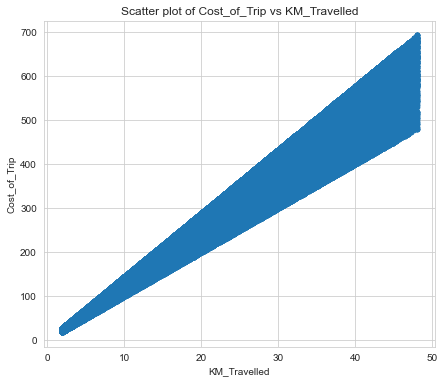

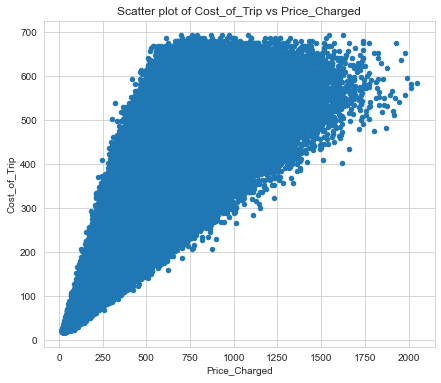

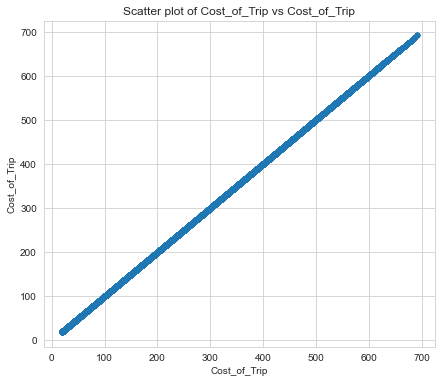

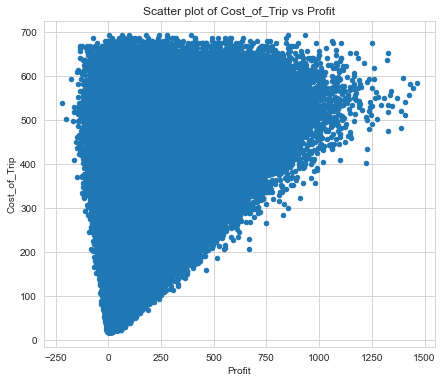

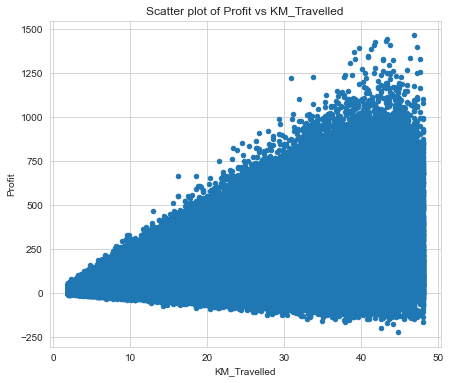

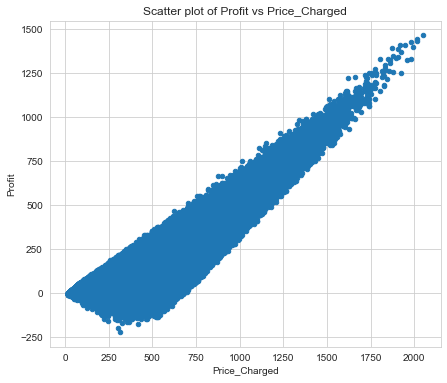

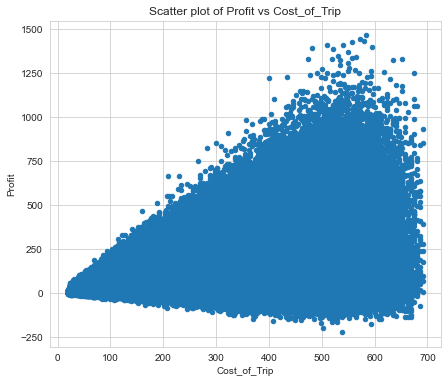

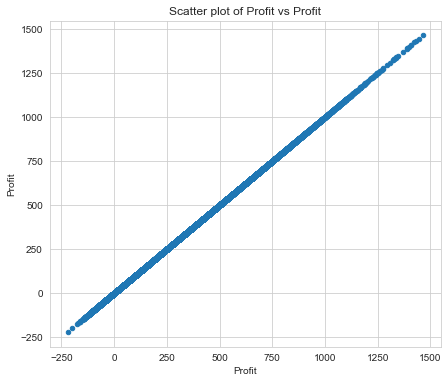

In [47]:
# creating a scatter plot for numerical columns that have strong correlation values
cols = ['KM_Travelled', 'Price_Charged', 'Cost_of_Trip', 'Profit']
for col_y in cols:
    def scatter_plot(df, cols, col_y):
        for col in cols:
            fig = plt.figure(figsize = (7,6))
            ax = fig.gca()
            df.plot.scatter(x = col, y = col_y, ax = ax)
            ax.set_title('Scatter plot of ' + col_y + ' vs ' + col)
            ax.set_xlabel(col)
            ax.set_ylabel(col_y)
            plt.show()
    scatter_plot(master_data, cols, col_y)

Profit
Box plot for  Pink Cab


For Profit vs quarter


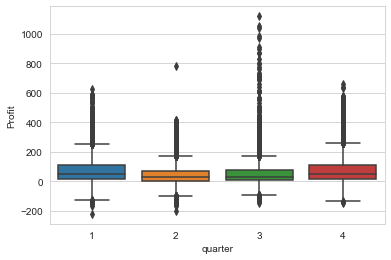

Box plot for  Yellow Cab


For Profit vs quarter


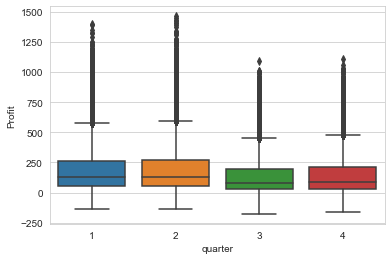

Price_Charged
Box plot for  Pink Cab


For Price_Charged vs quarter


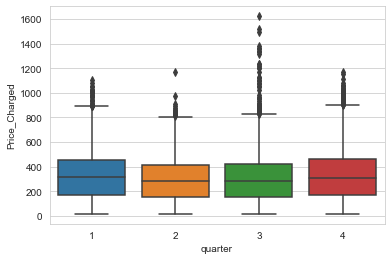

Box plot for  Yellow Cab


For Price_Charged vs quarter


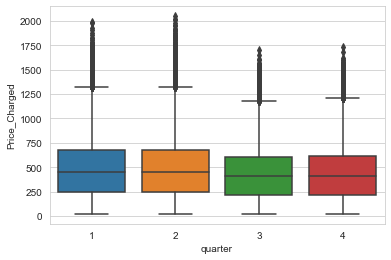

Cost_of_Trip
Box plot for  Pink Cab


For Cost_of_Trip vs quarter


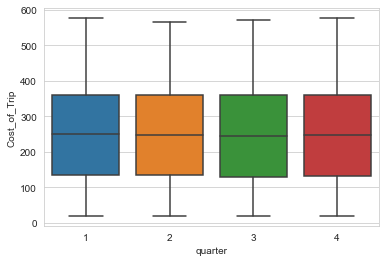

Box plot for  Yellow Cab


For Cost_of_Trip vs quarter


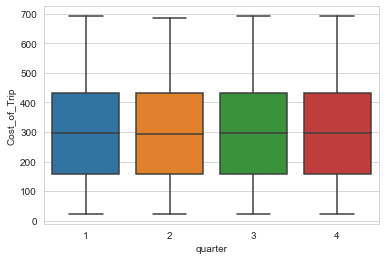

In [48]:
#box plot for profit, price charged and cost of trip vs quarter by company
def by_company(col):
    df = master_data[[col, 'quarter','Company']]#creating a dataframe
    df = df.groupby(['Company'])#grouping by company
    df1 = df.get_group('Pink Cab')#getting dataframe of just pink cab
    df2 = df.get_group('Yellow Cab')#getting dataframe of just yellow cab
    sets = [df1, df2]
    for df in sets:
        cab = 'Pink Cab'
        if cab  in df['Company'].unique().tolist():
            cab = 'Pink Cab'
        else:
            cab = 'Yellow Cab'
        print('Box plot for '+' '+cab)
        box_plot(df, [col], ['quarter'])#box_plot of col vs quarter of each dataframe
cols = ['Profit', 'Price_Charged', 'Cost_of_Trip'] 
for col in cols:
    print(col)
    by_company(col)

In [49]:
#quantitative analysis
#chi square test (test of independence)
print('Ho:Yellow cab does not have more transactions than pink cab')
print('H1:Yellow cab has more transactions than pink cab')
import scipy.stats as stats #importing starts
#creating a contigency table
data_crosstab = pd.crosstab(master_data['Company']=='Pink Cab',master_data['Company']=='Yellow Cab',
                            margins=True, margins_name="Total")
# significance level
alpha = 0.05
# Calcualtion of Chisquare test statistics
chi_square = 0
rows = (master_data['Company']=='Pink Cab').unique()
columns = (master_data['Company']=='Yellow Cab').unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E
# The p-value approach
p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Ho:Yellow cab does not have more transactions than pink cab
H1:Yellow cab has more transactions than pink cab
chisquare-score is: 359391.99999999994  and p value is: 0.0
Null Hypothesis is rejected.


In [50]:
#quantitative analysis for price charge vs company and cost of trip vs company and comapny vs profit
#creating a function for performing t-test
def company(list, DF=master_data):
    for col in list:
        print(col)
        df = master_data[['Company', col]] #forming a dataframe with the two columns
        df = df.groupby(['Company'])#grouping price charged by company
        p = df.get_group('Pink Cab')[col]#getting prices for pink cab
        group_p = p.to_numpy()
        y = df.get_group('Yellow Cab')[col]#getting prices for yellow cab
        group_y = y.to_numpy()
        #find variance for each group
#the populations have equal variances if the ratio of the larger sample variance,
#to the smaller sample variance is less than 4:1.
        print(np.var(group_p), np.var(group_y))
    #creating the hypothesis
        if col == 'Price_Charged':
            print('Ho:Yellow cab does not have a greater revenue(price charge) than the pink cab')
            print('H1: Yellow cab has greater revenue(price charge) than the pink cab')
        elif col == 'Profit':
            print('Ho:Yellow cab does not have more profits/higher profits than the pink cab')
            print('H1:Yellow cab has more profits/higher profits than the pink cab')
        else:
            print('Ho:Yellow cab does not have a higher cost of trip (expenditure) than pink cab')
            print('H1:Yellow cab has higher cost of trip (expenditure) than pink cab')
        #student t-test
        #t-test using scipy
        #perform two sample t-test with equal variances
        from scipy.stats import ttest_ind
        t_stat, p = ttest_ind(a=group_p, b=group_y, equal_var=True)
        print(f't={t_stat}, p={p}')
        if p <= 0.05:
            print('Null hypothesis is rejected')
        else:
            print('Failed to reject the Null hypothesis')
#creating list of columns
list = ['Price_Charged', 'Cost_of_Trip', 'Profit']
company(list)

Price_Charged
33122.02972214706 83166.27784471643
Ho:Yellow cab does not have a greater revenue(price charge) than the pink cab
H1: Yellow cab has greater revenue(price charge) than the pink cab
t=-140.37224404354254, p=0.0
Null hypothesis is rejected
Cost_of_Trip
18333.84937560077 26422.076629012972
Ho:Yellow cab does not have a higher cost of trip (expenditure) than pink cab
H1:Yellow cab has higher cost of trip (expenditure) than pink cab
t=-80.88610180101671, p=0.0
Null hypothesis is rejected
Profit
6020.195736256935 29523.32218542045
Ho:Yellow cab does not have more profits/higher profits than the pink cab
H1:Yellow cab has more profits/higher profits than the pink cab
t=-160.37151759478064, p=0.0
Null hypothesis is rejected


In [51]:
#quantitative analysis for profit, price_charged and cost_of_trip vs quarter in the yellow cab
#ANOVA test
cols =  ['Price_Charged', 'Profit', 'Cost_of_Trip'] #creating column list
#creating a function for the ANOVA test
def ANOVA(cols, DF=master_data):
    for col in cols:
        df = master_data[[col, 'quarter','Company']]#creating a dataframe
        df = df.groupby(['Company'])#grouping by company
        df2 = df.get_group('Yellow Cab')#getting dataframe of just yellow cab
        q_list = df2['quarter'].unique().tolist()#creating list of quarter values
        print(col)
        #creating the hypothesis
        print('Ho:'+col + ' for yellow cab is not higher in the first two quarters')
        print('H1:'+col + ' for yellow cab is higher in the first two quarters')
        qg = []#creating an empty list for quarter groups
        for q in q_list:
            df = master_data[[col, 'quarter']]
            q = df[col][df['quarter']==q]
            q = q.to_numpy()
            qg.append(q)
        #one-way ANOVA
        import scipy.stats as stats
        fvalue, pvalue = stats.f_oneway(qg[0], qg[1], qg[2], qg[3])
        print(fvalue, pvalue)
        if pvalue <= 0.05:
            print('Null hypothesis is rejected')
        else:
            print('Failed to reject the Null hypothesis')
ANOVA(cols)

Price_Charged
Ho:Price_Charged for yellow cab is not higher in the first two quarters
H1:Price_Charged for yellow cab is higher in the first two quarters
757.1175620911646 0.0
Null hypothesis is rejected
Profit
Ho:Profit for yellow cab is not higher in the first two quarters
H1:Profit for yellow cab is higher in the first two quarters
1989.8294453795368 0.0
Null hypothesis is rejected
Cost_of_Trip
Ho:Cost_of_Trip for yellow cab is not higher in the first two quarters
H1:Cost_of_Trip for yellow cab is higher in the first two quarters
9.012845177124877 5.78158231310226e-06
Null hypothesis is rejected


In [52]:
#quantitative analysis profit vs city
#ANOVA test
#creating a function for the ANOVA test
def ANOVA(df, col='Profit'):
    cities = df['City'].unique().tolist()#creating list of city values
    #creating the hypothesis
    print('Ho:New York City does not have the highest profit.')
    print('H1:New York City has the highest profit')
    cg = []#creating an empty list for city groups
    for city in cities:
        df = df[[col, 'City']]
        city = df[col][df['City']==city]
        city = city.to_numpy()
        cg.append(city)
    #one-way ANOVA
    import scipy.stats as stats
    fvalue, pvalue = stats.f_oneway(cg[0], cg[1], cg[2], cg[3], cg[4], cg[5], cg[6], cg[7], 
                                    cg[8],cg[9], cg[10], cg[11], cg[12], cg[13], cg[14], 
                                    cg[15], cg[16], cg[17],cg[18])
    print(fvalue, pvalue)
    if pvalue <= 0.05:
        print('Null hypothesis is rejected')
    else:
        print('Failed to reject the Null hypothesis')
for df in [df_pink, df_yellow]:
    ANOVA(df)

Ho:New York City does not have the highest profit.
H1:New York City has the highest profit
531.3167193452095 0.0
Null hypothesis is rejected
Ho:New York City does not have the highest profit.
H1:New York City has the highest profit
8780.98341552091 0.0
Null hypothesis is rejected
